**Описание работы.**

Перед нами стоит задача – подготовить аналитический отчет для HR-отдела. На основании проведенной аналитики предполагается составить рекомендации для отдела кадров по стратегии набора персонала, а также по взаимодействию с уже имеющимися сотрудниками. 

В базе данных лежит набор таблиц, которые содержат данные о сотрудниках вымышленной компании. Необходимо выполнить обзор штата сотрудников компании. Далее нужно составить набор предметов исследования, а затем проверить их на данных. Вся аналитика должна быть выполена с помощью SQL. Впоследствии данные можно визуализировать, однако финальные датафреймы для графиков также должны быть подготовлены с помощью SQL.

**Содержание**

[Разведочный анализ данных](#sectionEDA)
1. [Общая информация](#section1)  
    1.1. [Наборы данных](#section11)  
    
    
2. [Работа с данными](#section2)  
    2.1. [Знакомство с таблицами](#section21)  
    2.2. [Изучение атрибутов датасета и выведения ряда статистик](#section22)  
    2.2.1. [Распределение работников по департаментам](#section221)  
    2.2.2. [Распределение мужчин и женщин по департаментам](#section222)  
    2.2.3. [Распределение зарплатного фонда по департаментам](#section223)  
    2.2.4. [Распределение зарплатного фонда между мужчинами и женщинами по департаментам](#section224)  
    2.2.5. [Распределение средней зарплаты мужчин и женщин по департаментам](#section225)  
    2.2.6. [Расовая структура департаментов](#section226)    
    
    
3. [Анализ факторов, влияющих на эффективность сотрудника](#section3)  
    3.1. [Зависимость эффективности сотрудника от продолжительности работы в данной компании](#section31)  
    3.2. [Зависимость эффективности сотрудника от уровня заработной платы](#section32)  
    3.3. [Зависимость эффективности сотрудника и продолжительности работы в компании от возраста](#section33)  
    3.4. [Зависимость эффективности сотрудника и продолжительности работы в компании от семейного положения](#section34)  
    3.5. [Зависимость эффективности сотрудника и продолжительности работы в компании от расы](#section35)  


4. [Оценка текучести каждого департамента](#section4)  


5. [Оценка эффективности департамента](#section5)  
    5.1. [Оценка эффективности департамента по удельному количеству увольнений](#section51)  
    5.2. [Оценка эффективности департамента по среднему Performance Score работников](#section52)  
    5.3. [Итоговая оценка департаментов](#section53)  


6. [Эффективность площадок для размещения вакансий](#section6)  
    6.1. [Оценка площадки исходя из подсчёта расходов на неё и количества приведенных сотрудников](#section61)  
    6.2. [Оценка площадки исходя из соотношения кол-ва приведенных сотрудников к количеству уволившихся](#section62)  
    6.3. [Оценка площадки исходя из оценки менеджерами сотрудников, пришедших через неё](#section63)  
    6.4. [Оценка площадки исходя из количества сотрудников, пришедших через неё](#section64)  
    
    
7. [Оценка эффективности менеджера](#section7)  
    7.1. [Оценка эффективности менеджера по удельному количеству увольнений](#section71)  
    7.2. [Оценка эффективности менеджера по среднему Performance Score работников](#section72)  
    7.3. [Оценка эффективности менеджера по кол-ву подчинненных](#section73)  
    7.4. [Итоговая оценка эффективности менеджера](#section74)  
    
    
8. [Прогнозирование скорого увольнения](#section8)  

# Разведочный анализ данных. <a id="sectionEDA"></a>

## 1. Общая информация. <a id="section1"></a>
### 1.1. Наборы данных. <a id="section11"></a>

In [1]:
import psycopg2
import pandas as pd
import sqlite3
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams["figure.figsize"] = (10.0, 7.0)

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

pg_connection = {
    "host": "dsstudents.skillbox.ru",
    "port": 5432,
    "dbname": "human_resources",
    "user": "readonly",
    "password": "***"
}
conn = psycopg2.connect(**pg_connection)
cursor = conn.cursor()

Узнаем какие таблицы есть в нашей БД

In [2]:
sql_str = "SELECT table_name FROM information_schema.tables WHERE table_schema='public';"
cursor.execute(sql_str)
table_columns = [a[0] for a in cursor.fetchall()]
print(table_columns)

['hr_dataset', 'production_staff', 'recruiting_costs', 'salary_grid', 'tmpDB']


## 2. Работа с данными. <a id="section2"></a>
### 2.1. Знакомство с  таблицами. <a id="section21"></a>

Посмотрим на таблицу hr_dataset

In [3]:
hr_dataset_df = pd.read_sql_query('SELECT * FROM hr_dataset;', conn)
hr_dataset_df

,id,Employee Name,Employee Number,marriedid,maritalstatusid,genderid,empstatus_id,deptid,perf_scoreid,age,Pay Rate,state,zip,dob,sex,maritaldesc,citizendesc,Hispanic/Latino,racedesc,Date of Hire,Days Employed,Date of Termination,Reason For Term,Employment Status,department,position,Manager Name,Employee Source,Performance Score
0,1,"Brown, Mia",1103024456,1,1,0,1,1,3,30,28.50,MA,1450,1987-11-24,Female,Married,US Citizen,No,Black or African American,2008-10-27,3317,None,N/A - still employed,Active,Admin Offices,Accountant I,Brandon R. LeBlanc,Diversity Job Fair,Fully Meets
1,2,"LaRotonda, William",1106026572,0,2,1,1,1,3,34,23.00,MA,1460,1984-04-26,Male,Divorced,US Citizen,No,Black or African American,2014-01-06,1420,None,N/A - still employed,Active,Admin Offices,Accountant I,Brandon R. LeBlanc,Website Banner Ads,Fully Meets
2,3,"Steans, Tyrone",1302053333,0,0,1,1,1,3,31,29.00,MA,2703,1986-09-01,Male,Single,US Citizen,No,White,2014-09-29,1154,None,N/A - still employed,Active,Admin Offices,Accountant I,Brandon R. LeBlanc,Internet Search,Fully Meets
3,4,"Howard, Estelle",1211050782,1,1,0,1,1,9,32,21.50,MA,2170,1985-09-16,Female,Married,US Citizen,No,White,2015-02-16,58,2015-04-15,N/A - still employed,Active,Admin Offices,Administrative Assistant,Brandon R. LeBlanc,Pay Per Click - Google,N/A- too early to review
4,5,"Singh, Nan",1307059817,0,0,0,1,1,9,30,16.56,MA,2330,1988-05-19,Female,Single,US Citizen,No,White,2015-05-01,940,None,N/A - still employed,Active,Admin Offices,Administrative Assistant,Brandon R. LeBlanc,Website Banner Ads,N/A- too early to review
5,6,"Smith, Leigh Ann",711007713,1,1,0,5,1,3,30,20.50,MA,1844,1987-06-14,Female,Married,US Citizen,No,Asian,2011-09-26,730,2013-09-25,career change,Voluntarily Terminated,Admin Offices,Administrative Assistant,Brandon R. LeBlanc,Diversity Job Fair,Fully Meets
6,7,"LeBlanc, Brandon R",1102024115,1,1,1,1,1,3,33,55.00,MA,1460,1984-06-10,Male,Married,US Citizen,No,White,2016-01-05,691,None,N/A - still employed,Active,Admin Offices,Shared Services Manager,Janet King,Monster.com,Fully Meets
7,8,"Quinn, Sean",1206043417,1,1,1,5,1,3,33,55.00,MA,2045,1984-11-06,Male,Married,Eligible NonCitizen,No,Black or African American,2011-02-21,1636,2015-08-15,career change,Voluntarily Terminated,Admin Offices,Shared Services Manager,Janet King,Diversity Job Fair,Fully Meets
8,9,"Boutwell, Bonalyn",1307060188,1,1,0,1,1,0,31,34.95,MA,2468,1987-04-04,Female,Married,US Citizen,No,Asian,2015-02-16,1014,None,N/A - still employed,Active,Admin Offices,Sr. Accountant,Brandon R. LeBlanc,Diversity Job Fair,90-day meets
9,10,"Foster-Baker, Amy",1201031308,1,1,0,1,1,3,39,34.95,MA,2050,1979-04-16,Female,Married,US Citizen,no,White,2009-01-05,3247,None,N/A - still employed,Active,Admin Offices,Sr. Accountant,Board of Directors,Other,Fully Meets


In [4]:
employees_df = pd.read_sql_query(
'SELECT DISTINCT id, "Employee Name" FROM hr_dataset WHERE "Employee Name" IS NOT NULL;', conn)
print('Количество работников датасета:', len(employees_df), '\n')

state_df = pd.read_sql_query(
'SELECT DISTINCT state FROM hr_dataset WHERE state IS NOT NULL;', conn)
print('Место рождения (штат) :', state_df['state'].to_list(), '\n')

citizendesc_df = pd.read_sql_query(
'SELECT DISTINCT citizendesc FROM hr_dataset WHERE citizendesc IS NOT NULL;', conn)
print('Статус гражданства:', citizendesc_df['citizendesc'].to_list(), '\n')

racedesc_df = pd.read_sql_query(
'SELECT DISTINCT racedesc FROM hr_dataset WHERE racedesc IS NOT NULL;', conn)
print('Группы рас работников компании:', racedesc_df['racedesc'].to_list(), '\n')

term_reasons_df = pd.read_sql_query(
'SELECT DISTINCT "Reason For Term" FROM hr_dataset WHERE "Reason For Term" IS NOT NULL;', conn)
print('Причины увольнения:', term_reasons_df['Reason For Term'].to_list(), '\n')

employment_status_df = pd.read_sql_query(
'SELECT DISTINCT "Employment Status" FROM hr_dataset WHERE "Employment Status" IS NOT NULL;', conn)
print('Статусы работников:', employment_status_df['Employment Status'].to_list(), '\n')

departments_df = pd.read_sql_query(
'SELECT DISTINCT department FROM hr_dataset WHERE department IS NOT NULL;', conn)
print('Подразделения компании:', departments_df['department'].to_list(), '\n')

positions_df = pd.read_sql_query(
'SELECT DISTINCT position FROM hr_dataset WHERE position IS NOT NULL;', conn)
print('Должности компании в датасете:', positions_df['position'].to_list(), '\n')

employee_source_df = pd.read_sql_query(
'SELECT DISTINCT "Employee Source" FROM hr_dataset WHERE "Employee Source" IS NOT NULL;', conn)
print('Источник информации о вакансии', employee_source_df['Employee Source'].to_list(), '\n')

performance_score_df = pd.read_sql_query(
'SELECT DISTINCT "Performance Score" FROM hr_dataset WHERE "Performance Score" IS NOT NULL;', conn)
print('Эффективность сотрудника', performance_score_df['Performance Score'].to_list(), '\n')

Количество работников датасета: 310 

Место рождения (штат) : ['CA', 'NH', 'OR', 'ND', 'TX', 'NV', 'KY', 'OH', 'NY', 'IN', 'FL', 'ME', 'NC', 'CT', 'RI', 'GA', 'ID', 'PA', 'MT', 'TN', 'WA', 'MA', 'AL', 'UT', 'CO', 'VT', 'VA', 'AZ'] 

Статус гражданства: ['Eligible NonCitizen', 'Non-Citizen', 'US Citizen'] 

Группы рас работников компании: ['American Indian or Alaska Native', 'Hispanic', 'Two or more races', 'Asian', 'White', 'Black or African American'] 

Причины увольнения: ['N/A - Has not started yet', 'attendance', 'more money', 'medical issues', 'maternity leave - did not return', 'return to school', 'relocation out of area', 'performance', 'gross misconduct', 'military', 'hours', 'career change', 'unhappy', 'retiring', 'Another position', 'no-call, no-show', 'N/A - still employed'] 

Статусы работников: ['Future Start', 'Voluntarily Terminated', 'Active', 'Terminated for Cause', 'Leave of Absence'] 

Подразделения компании: ['Production       ', 'Admin Offices', 'IT/IS', 'Executive

**Вывод:**  
таблица *hr_dataset* содержит следующие значения:
 - id - id сотрудника
 - Employee Name - имя и фамилия сотрудника
 - Employee Number - индивидульный номер сотрудника
 - marriedid - бинарное значение семейного статуса (1 - не холост, 0 - холост)
 - maritalstatusid - бинарное значение семейного положения (0 - холост, 1 - женатый/замужняя, 2 - в разводе, 3 - живет
 отдельно от семьи, 4 - вдовец/вдова)
 - genderid - бинарное значение пола сотрудника (0 - женский, 1 - мужской)
 - empstatus_id - бинарное значение статуса сотрудника (1 - активный, _ - скорое начало работы в компании,
 _ - уволенный, _ - в отпуске, 5 - уволившийся по собсвтенному желанию)
 - deptid - бинарное значение департамента, в котором работает сотрудник (1 - Admin Offices, _ - Production, _ - IT/IS,
 _ - Executive Office, _ - Software Engineering, _ - Sales
 - perf_scoreid - бинарное значение оценки эффективности сотрудника (3 - Fully Meets, 9 - N/A- too early to review,
 _ - Exceptional, _ - 90-day meets, _ - N/A- too early to review, _ - Exceeds, _ - PIP, _ - Needs Improvement)
 - age - возраст сотрудника
 - Pay Rate - почасовая заработная плата
 - state - штат рождения
 - zip - индекс места рождения
 - dob - дата рождения (в формате yyyy-mm-dd)
 - sex - пол (Female, Male)
 - maritaldesc - семейное положение (Divorced, Married, Separated, Single, Widowed)
 - citizendesc - гражданский статус (US Citizen, Eligible NonCitizen, Non-Citizen)
 - Hispanic/Latino - латиноамериканская раса (Yes, No)
 - racedesc - раса (American Indian or Alaska Native, Hispanic, Two or more races, Asian, White, Black or African American
 - Date of Hire - дата приёма на работу (в формате yyyy-mm-dd)
 - Days Employed - кол-во отработанных дней
 - Date of Termination - дата увольнения (в формате yyyy-mm-dd)
 - Reason For Term - причина увольнения (attendance, more money, medical issues, maternity leave - did not return и т. д.)
 - Employment Status - статус работника (Future Start, Voluntarily Terminated, Active, Terminated for Cause, 'eave of Absence)
 - department - департамент, в котором работает сотрудник (Production, Admin Offices, IT/IS, Executive Office, Software Engineering,
 Sales)
 - position - должность сотрудника
 - Manager Name - имя и фамилия руководителя
 - Employee Source - площадка, с которой пришёл сотрудник (Indeed, Newspager/Magazine, Monster.com и т. д.)
 - Performance Score - оценка эффективности сотрудника (Exceptional, 90-day meets, N/A- too early to review,
 Fully Meets, Exceeds, PIP, Needs Improvement)


**Посмотрим на таблицу production_staff.**

In [5]:
production_staff_df = pd.read_sql_query('SELECT * FROM production_staff', conn)
production_staff_df

,id,Employee Name,Race Desc,Date of Hire,TermDate,Reason for Term,Employment Status,Department,Position,Pay,Manager Name,Performance Score,Abutments/Hour Wk 1,Abutments/Hour Wk 2,Daily Error Rate,90-day Complaints
0,1,"Albert, Michael",White,2011-08-01,None,N/A - still employed,Active,Production,Production Manager,$54.50,Elisa Bramante,Fully Meets,0.0,0.0,0.0,0.0
1,2,"Bozzi, Charles",Asian,2013-09-30,2014-08-07,retiring,Voluntarily Terminated,Production,Production Manager,$50.50,Elisa Bramante,Fully Meets,0.0,0.0,0.0,0.0
2,3,"Butler, Webster L",White,2016-01-28,None,N/A - still employed,Active,Production,Production Manager,$55.00,Elisa Bramante,Exceeds,0.0,0.0,0.0,0.0
3,4,"Dunn, Amy",White,2014-09-18,None,N/A - still employed,Active,Production,Production Manager,$51.00,Elisa Bramante,Fully Meets,0.0,0.0,0.0,0.0
4,5,"Gray, Elijiah",White,2015-06-02,None,N/A - still employed,Active,Production,Production Manager,$54.00,Elisa Bramante,Fully Meets,0.0,0.0,0.0,0.0
5,6,"Hogland, Jonathan",White,2011-01-10,2015-12-12,attendance,Terminated for Cause,Production,Production Manager,$48.00,Elisa Bramante,Fully Meets,0.0,0.0,0.0,0.0
6,7,"Immediato, Walter",Asian,2011-02-21,2012-09-24,unhappy,Voluntarily Terminated,Production,Production Manager,$42.00,Elisa Bramante,Needs Improvement,0.0,0.0,0.0,0.0
7,8,"Liebig, Ketsia",White,2013-09-30,None,N/A - still employed,Active,Production,Production Manager,$55.00,Elisa Bramante,Exceeds,0.0,0.0,0.0,0.0
8,9,"Miller, Brannon",Hispanic,2012-08-16,None,N/A - still employed,Active,Production,Production Manager,$53.00,Elisa Bramante,Fully Meets,0.0,0.0,0.0,0.0
9,10,"Peterson, Ebonee",White,2010-10-25,2016-05-18,Another position,Voluntarily Terminated,Production,Production Manager,$38.00,Elisa Bramante,Fully Meets,0.0,0.0,0.0,0.0


**Вывод:**  
таблица *production_staff* содержит следующие значения:
 - id - id сотрудника
 - Employee Name - имя и фамилия сотрудника
 - Race Desc - раса (American Indian or Alaska Native, Hispanic, Two or more races, Asian, White, Black or African American)
 - Date of Hire - дата приёма на работу (в формате yyyy-mm-dd)
 - TermDate - дата увольнения (в формате yyyy-mm-dd)
 - Reason for Term - причина увольнения (attendance, more money, medical issues, maternity leave - did not return и т. д.)
 - Employment Status - статус работника (Future Start, Voluntarily Terminated, Active, Terminated for Cause, 'eave of Absence)
 - Department - департамент, в котором работает сотрудник (Production, Admin Offices, IT/IS, Executive Office, Software Engineering,
 Sales)
 - Position - должность сотрудника
 - Pay - почасовая заработная плата
 - Manager Name - имя и фамилия руководителя
 - Performance Score - оценка эффективности сотрудника (Exceptional, 90-day meets, N/A- too early to review,
 Fully Meets, Exceeds, PIP, Needs Improvement)

**Посмотрим на таблицу recruiting_costs**

In [6]:
recruiting_costs_df = pd.read_sql_query("SELECT * FROM recruiting_costs", conn)
recruiting_costs_df

,id,Employment Source,January,February,March,April,May,June,July,August,September,October,November,December,Total
0,1,Billboard,520,520,520,520,0,0,612,612,729,749,910,500,6192
1,2,Careerbuilder,410,410,410,820,820,410,410,820,820,1230,820,410,7790
2,3,Company Intranet - Partner,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,Diversity Job Fair,0,5129,0,0,0,0,0,4892,0,0,0,0,10021
4,5,Employee Referral,0,0,0,0,0,0,0,0,0,0,0,0,0
5,6,Glassdoor,0,0,0,0,0,0,0,0,0,0,0,0,0
6,7,Information Session,0,0,0,0,0,0,0,0,0,0,0,0,0
7,8,Internet Search,0,0,0,0,0,0,0,0,0,0,0,0,0
8,9,MBTA ads,640,640,640,640,640,640,640,1300,1300,1300,1300,1300,10980
9,10,Monster.com,500,500,500,440,500,500,440,500,440,440,500,500,5760


**Вывод:**  
таблица recruiting_costs содержит следующие значения:
 - id - id сотрудника
 - Employee Source - площадка, с которой пришёл сотрудник (Indeed, Newspager/Magazine, Monster.com и т. д.)
 - January, February, March, April, May, June, July, August, September, October, November, December - месячные затраты на
 площадку
 - Total - годовые расходы на площадку.

**Узнаем какие поля есть в таблице salary_grid**

In [7]:
salary_grid_df = pd.read_sql_query('''
SELECT *
FROM salary_grid
ORDER BY "Hourly Mid" DESC;''', conn)
salary_grid_df

,id,Position,Salary Min,Salary Mid,Salary Max,Hourly Min,Hourly Mid,Hourly Max
0,9,Sr. DBA,92863,116007,139170,44.65,55.77,66.91
1,7,Sr. Network Engineer,79428,99458,120451,38.19,47.82,57.91
2,5,Sr. Accountant,63264,76988,92454,30.42,37.01,44.45
3,8,Database Administrator,50569,68306,93312,24.31,32.84,44.86
4,6,Network Engineer,50845,66850,88279,24.44,32.14,42.44
5,4,Accountant II,50490,62158,74658,24.27,29.88,35.89
6,12,Lead Production Technician,45000,55000,65000,21.63,26.44,31.25
7,3,Accountant I,42274,51425,62299,20.32,24.72,29.95
8,11,Production Technician II,38000,48000,58000,18.27,23.08,27.88
9,2,Sr. Administrative Assistant,35000,45000,55000,16.83,21.63,26.44


**Вывод:**  
таблица salary_grid содержит следующие значения:
 - id - id сотрудника
 - Position - должность сотрудника
 - Salary Min - минимальная годовая зарплата
 - Salary Mid - средняя годовая зарплата
 - Salary Max - максимальная годовая зарплата
 - Hourly Min - минимальная почасовая оплата
 - Hourly Mid - средняя почасовая оплата
 - Hourly Max - максимальная почасовая оплата

### 2.2. Изучение атрибутов датасета и выведения ряда статистик. <a id="section22"></a>
#### 2.2.1. Распределение работников по департаментам. <a id="section221"></a>

In [8]:
employees_number_by_deps = pd.read_sql_query('''
SELECT "department",
COUNT(*) AS "employees number"
FROM hr_dataset
GROUP BY "department"
ORDER BY "department"
''', conn)
employees_number_by_deps.set_index('department', inplace=True)
employees_number_by_deps

,employees number
department,
Admin Offices,10
Executive Office,1
IT/IS,50
Production,208
Sales,31
Software Engineering,10


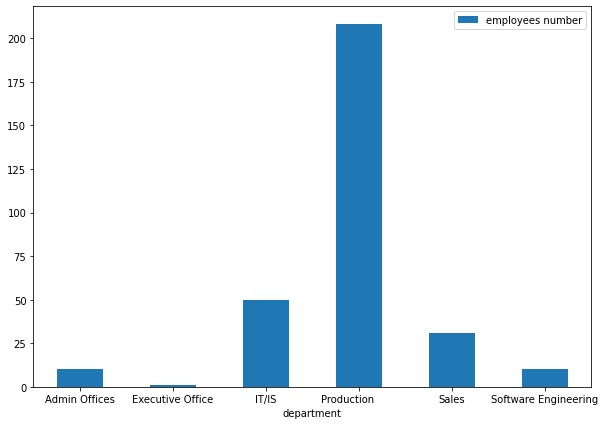

In [9]:
employees_number_by_deps.plot.bar(rot=0)

**Вывод:**  
 - больше всего сотрудников работуют в департаменте Production - 208 сотрудников;
 - меньше всего - в Executive Office (1), Software Engineering (10) и Admin Offices (10).

#### 2.2.2. Распределение мужчин и женщин по департаментам. <a id="section222"></a>

In [10]:
male_female_by_deps = pd.read_sql_query('''
SELECT "department", "sex",
COUNT(*) AS "employees number"
FROM hr_dataset
GROUP BY "department", "sex"
ORDER BY "department", "sex"
''', conn)
male_female_by_deps

,department,sex,employees number
0,Admin Offices,Female,6
1,Admin Offices,Male,4
2,Executive Office,Female,1
3,IT/IS,Female,22
4,IT/IS,Male,28
5,Production,Female,127
6,Production,Male,81
7,Sales,Female,15
8,Sales,Male,16
9,Software Engineering,Female,6


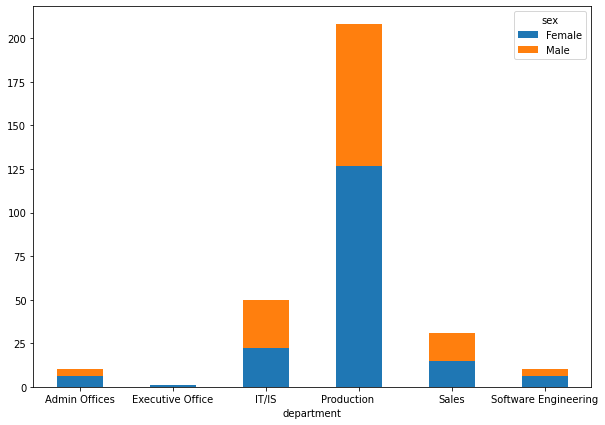

In [11]:
male_female_by_deps = male_female_by_deps.pivot\
(index='department', columns='sex', values='employees number')
male_female_by_deps.plot.bar(stacked=True, rot=0)

**Вывод:**  
 - департамент Production можно назвать более женским, все остальные имеем недерную равномерность.

#### 2.2.3. Распределение зарплатного фонда по департаментам.  <a id="section223"></a>

In [12]:
salary_by_deps = pd.read_sql_query('''
SELECT "department",
SUM("Pay Rate") AS "salary_exspenses"
FROM hr_dataset
GROUP BY "department"
ORDER BY "department"
''', conn)
salary_by_deps.set_index('department', inplace=True)
salary_by_deps

,salary_exspenses
department,
Admin Offices,318.96
Executive Office,80.00
IT/IS,2289.48
Production,4801.95
Sales,1721.25
Software Engineering,486.65


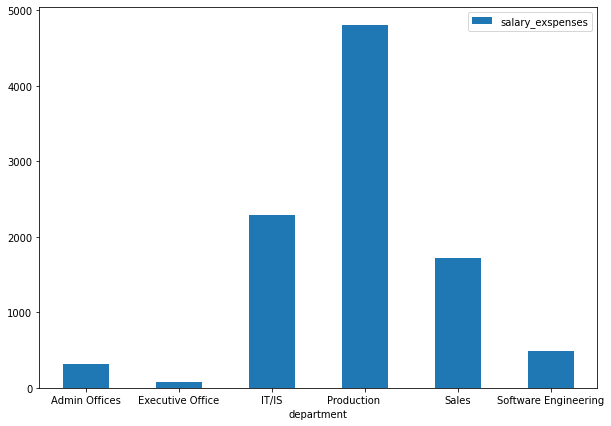

In [13]:
salary_by_deps.plot.bar(rot=0)

**Вывод:**  
 - большая часть зарплатного фонда компании тратится на департамент Production (суммировалась почасовая оплата) (4802 USD/час);
 - меньше выделяется на Executive Office (80 USD/час), Admin Offices (319 USD/час) и Software Engineering (487 USD/час).

#### 2.2.4. Распределение зарплатного фонда между мужчинами и женщинами по департаментам. <a id="section224"></a>

In [14]:
male_female_salary_by_deps = pd.read_sql_query('''
SELECT "department", "sex",
SUM("Pay Rate") AS "salary_exspenses"
FROM hr_dataset
GROUP BY "department", "sex"
ORDER BY "department", "sex"
''', conn)
male_female_salary_by_deps

,department,sex,salary_exspenses
0,Admin Offices,Female,156.96
1,Admin Offices,Male,162.00
2,Executive Office,Female,80.00
3,IT/IS,Female,958.44
4,IT/IS,Male,1331.04
5,Production,Female,2871.94
6,Production,Male,1930.01
7,Sales,Female,835.25
8,Sales,Male,886.00
9,Software Engineering,Female,313.98


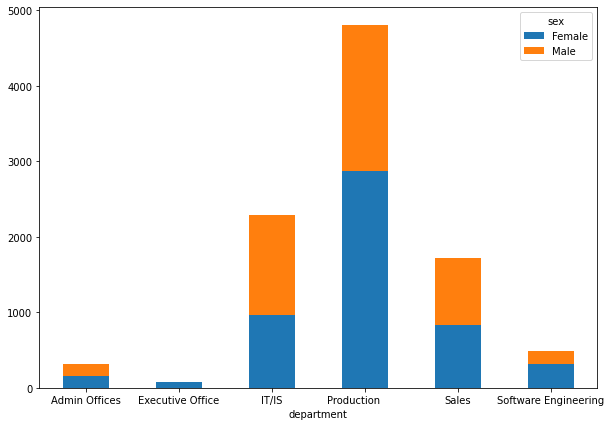

In [15]:
male_female_salary_by_deps = male_female_salary_by_deps.pivot\
(index='department', columns='sex', values='salary_exspenses')
male_female_salary_by_deps.plot.bar(stacked=True, rot=0)

**Вывод:**  
 - зарплатный фонд распределяется согласно гендерному распределению сотрудников компании.

#### 2.2.5. Распределение средней зарплаты мужчин и женщин по департаментам.  <a id="section225"></a>

In [16]:
avg_male_female_salary_by_deps = pd.read_sql_query('''
SELECT "department", "sex",
AVG("Pay Rate") AS "average pay rate"
FROM hr_dataset
GROUP BY "department", "sex"
ORDER BY "department", "sex"
''', conn)
avg_male_female_salary_by_deps

,department,sex,average pay rate
0,Admin Offices,Female,26.160000
1,Admin Offices,Male,40.500000
2,Executive Office,Female,80.000000
3,IT/IS,Female,43.565454
4,IT/IS,Male,47.537143
5,Production,Female,22.613701
6,Production,Male,23.827284
7,Sales,Female,55.683333
8,Sales,Male,55.375000
9,Software Engineering,Female,52.329999


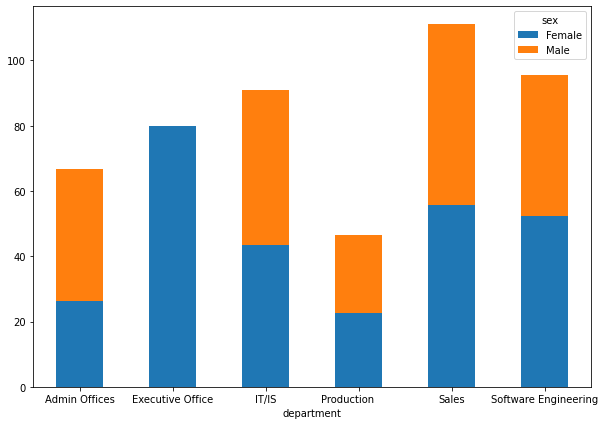

In [17]:
avg_male_female_salary_by_deps = avg_male_female_salary_by_deps.pivot\
(index='department', columns='sex', values='average pay rate')
avg_male_female_salary_by_deps.plot.bar(stacked=True, rot=0)

**Вывод:**
 - почти во вех департаментах средняя зарплаты сотрудника мужского и женского пола не отличается, кроме департамента Admin Offices (здесь на сотрудников мужчин приходится немного большая часть зарплатного фонда департамента).

#### 2.2.6. Расовая структура департаментов.  <a id="section226"></a>

In [18]:
race_structure_by_deps = pd.read_sql_query('''
SELECT "department", "racedesc",
COUNT(*) AS "employees number"
FROM hr_dataset
GROUP BY "department", "racedesc"
ORDER BY "department", "employees number"
''', conn)
race_structure_by_deps

,department,racedesc,employees number
0,Admin Offices,Asian,2
1,Admin Offices,Black or African American,3
2,Admin Offices,White,5
3,Executive Office,White,1
4,IT/IS,Hispanic,1
5,IT/IS,Two or more races,2
6,IT/IS,Asian,7
7,IT/IS,Black or African American,10
8,IT/IS,White,30
9,Production,Hispanic,3


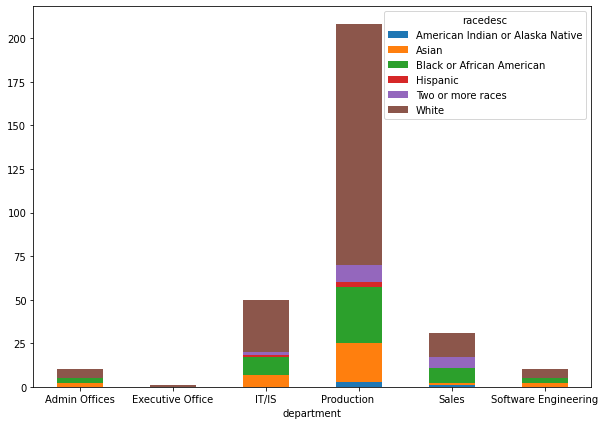

In [19]:
race_structure_by_deps = race_structure_by_deps.pivot\
(index='department', columns='racedesc', values='employees number')
race_structure_by_deps.plot.bar(stacked=True, rot=0)

**Вывод:**  
 - во всех департментах преобладает раса White;
 - меньше всего American Indian or Alaska Native.

## 3. Анализ факторов, влияющих на эффективность сотрудника. <a id="section3"></a>
### 3.1. Зависимость эффективности сотрудника от продолжительности работы в данной компании. <a id="section31"></a>

In [20]:
experience_efficiency = pd.read_sql_query('''
CREATE TEMPORARY TABLE IF NOT EXISTS work_experience_1 AS
    SELECT position,
    MIN("Days Employed") AS "Experience min",
    AVG("Days Employed") AS "Experience mid",
    MAX("Days Employed") AS "Experience max",
    (MIN("Days Employed") + (MAX("Days Employed") - MIN("Days Employed")) / 3) AS "min_mid line",
    (MAX("Days Employed") - (MAX("Days Employed") - MIN("Days Employed")) / 3) AS "mid_max line",
    COUNT(*) AS "Employees number"
    FROM hr_dataset
    GROUP BY position;
    
CREATE TEMPORARY TABLE IF NOT EXISTS work_experience_2 AS
    SELECT *
    FROM work_experience_1
    WHERE "Employees number" > 1;

SELECT work_experience_2.position,
"Employee Name",
(CASE
    WHEN "Performance Score" = 'Exceptional' THEN 6
    WHEN "Performance Score" = 'Exceeds' THEN 5
    WHEN "Performance Score" = 'Fully Meets' THEN 4
    WHEN "Performance Score" = '90-day meets' THEN 3
    WHEN "Performance Score" = 'Needs Improvement' THEN 2
    WHEN "Performance Score" = 'PIP' THEN 1
    WHEN "Performance Score" = 'N/A- too early to review' THEN 0
END) AS "Performance rate",
(CASE
    WHEN hr_dataset."Days Employed" < work_experience_2."min_mid line" THEN 'min experience'
    WHEN hr_dataset."Days Employed" BETWEEN work_experience_2."min_mid line" AND work_experience_2."mid_max line"\
        THEN 'mid experience'
    WHEN hr_dataset."Days Employed" > work_experience_2."mid_max line" THEN 'max experience'
END) AS "Experience status"
INTO experience_efficiency
FROM hr_dataset
JOIN work_experience_2 ON work_experience_2.position = hr_dataset.position;

SELECT "Experience status",
AVG("Performance rate") AS "Average performance rate"
FROM experience_efficiency
GROUP BY "Experience status"
ORDER BY "Experience status";
''', conn)
experience_efficiency

,Experience status,Average performance rate
0,max experience,3.321429
1,mid experience,3.828125
2,min experience,2.844828


Как можно видеть, при минимальном опыте и эффективность будет минимальная (средняя оценка эффективности 2,844). Максимум
эффективности (3,828) достигается при среднем стаже на каждой должности. Затем эффективность идет на спад и при большом
стаже достигает значения 3,32 эффективности.  
**Вывод:** прямой зависимости эффективности сотрудника от продолжительности работы в компании нет.

### 3.2. Зависимость эффективности сотрудника от уровня заработной платы.  <a id="section32"></a>

In [21]:
salary_efficiency = pd.read_sql_query('''
CREATE TEMPORARY TABLE IF NOT EXISTS salary_grid_1 AS
    SELECT position,
    MIN("Pay Rate") AS "Hourly min",
    AVG("Pay Rate") AS "Hourly mid",
    MAX("Pay Rate") AS "Hourly max",
    (MIN("Pay Rate") + (MAX("Pay Rate") - MIN("Pay Rate")) / 3) AS "min_mid line",
    (MAX("Pay Rate") - (MAX("Pay Rate") - MIN("Pay Rate")) / 3) AS "mid_max line",
    COUNT(*) AS "Employees number"
    FROM hr_dataset
    GROUP BY position;

CREATE TEMPORARY TABLE IF NOT EXISTS salary_grid_3 AS
    SELECT *
    FROM salary_grid_1
    WHERE "Employees number" > 1;
    
SELECT salary_grid_3.position,
"Employee Name",
(CASE
    WHEN "Performance Score" = 'Exceptional' THEN 6
    WHEN "Performance Score" = 'Exceeds' THEN 5
    WHEN "Performance Score" = 'Fully Meets' THEN 4
    WHEN "Performance Score" = '90-day meets' THEN 3
    WHEN "Performance Score" = 'Needs Improvement' THEN 2
    WHEN "Performance Score" = 'PIP' THEN 1
    WHEN "Performance Score" = 'N/A- too early to review' THEN 0
END) AS "Performance rate",
(CASE
    WHEN hr_dataset."Pay Rate" < salary_grid_3."min_mid line" THEN 'min salary'
    WHEN hr_dataset."Pay Rate" BETWEEN salary_grid_3."min_mid line" AND salary_grid_3."mid_max line"\
        THEN 'mid salary'
    WHEN hr_dataset."Pay Rate" > salary_grid_3."mid_max line" THEN 'max salary'
END) AS "Salary status"
INTO salary_efficiency
FROM hr_dataset
JOIN salary_grid_3 ON salary_grid_3.position = hr_dataset.position;

SELECT "Salary status",
AVG("Performance rate") AS "Average performance rate"
FROM salary_efficiency
GROUP BY "Salary status"
ORDER BY "Salary status";
''', conn)
salary_efficiency

,Salary status,Average performance rate
0,max salary,3.359551
1,mid salary,3.232143
2,min salary,3.484848


In [22]:
salary_experience_efficiency = pd.read_sql_query('''
SELECT "Experience status",
"Salary status",
AVG(experience_efficiency."Performance rate") AS "Average performance rate"
FROM experience_efficiency
JOIN salary_efficiency ON salary_efficiency."Employee Name" = experience_efficiency."Employee Name"
GROUP BY "Experience status", "Salary status"
ORDER BY "Experience status", "Salary status";
''', conn)
salary_experience_efficiency.set_index(['Experience status', 'Salary status'])

Average performance rate
Experience status Salary status                          
max experience    max salary                     2.904762
                  mid salary                     3.625000
                  min salary                     3.526316
mid experience    max salary                     3.564103
                  mid salary                     3.840909
                  min salary                     4.044444
min experience    max salary                     3.413793
                  mid salary                     2.596154
                  min salary                     2.742857

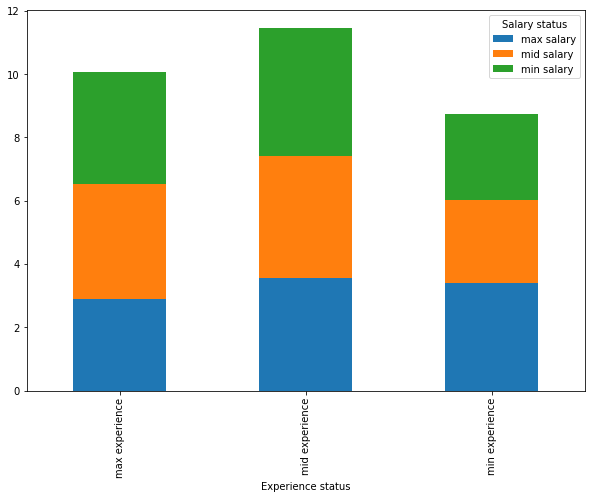

In [23]:
salary_experience_efficiency = salary_experience_efficiency.pivot\
(index='Experience status', columns='Salary status', values='Average performance rate')

salary_experience_efficiency.plot.bar(stacked=True)

Люди с заработком меньше среднего показывают максимальные значения эффективности. 3.48. Это можно связать с желанием работника
показать лучший результат и получить надбавку к зарплате. Следом идут работники с заработком выше среднего - 3.36 средняя
оценка эффективности. Эти «счастливчики» хоть и понимают, что у них неплохой уровень заработка по сравнению с коллегами все
же показывают результат хуже, чем их коллеги с зарплатой ниже среднего. Хуже всех по эффективности сотрудники со средним
уровнем заработка.  
**Вывод:** прямой зависимости эффективности от уровня заработной платы нет.

### 3.3. Зависимость эффективности сотрудника и продолжительности работы в компании от возраста.  <a id="section33"></a>

In [24]:
age_efficiency = pd.read_sql_query('''
SELECT
(CASE
    WHEN age BETWEEN 25 AND 30 THEN '25-29'
    WHEN age BETWEEN 30 AND 35 THEN '30-34'
    WHEN age BETWEEN 35 AND 40 THEN '35-39'
    WHEN age BETWEEN 40 AND 45 THEN '40-44'
    WHEN age BETWEEN 45 AND 50 THEN '45-49'
    WHEN age BETWEEN 50 AND 55 THEN '50-54'
    WHEN age BETWEEN 55 AND 60 THEN '55-59'
    WHEN age BETWEEN 60 AND 65 THEN '60-64'
    WHEN age >= 65 THEN '65+'
END) AS "Age group",
AVG(CASE
    WHEN "Performance Score" = 'Exceptional' THEN 6
    WHEN "Performance Score" = 'Exceeds' THEN 5
    WHEN "Performance Score" = 'Fully Meets' THEN 4
    WHEN "Performance Score" = '90-day meets' THEN 3
    WHEN "Performance Score" = 'Needs Improvement' THEN 2
    WHEN "Performance Score" = 'PIP' THEN 1
    WHEN "Performance Score" = 'N/A- too early to review' THEN 0
END) AS "Performance rate",
AVG("Days Employed") AS "Average days employed",
COUNT(*) AS "Group size"
FROM hr_dataset
WHERE "Days Employed" > 365
GROUP BY "Age group"
ORDER BY "Age group";
''', conn)
age_efficiency

,Age group,Performance rate,Average days employed,Group size
0,25-29,3.318182,1465.204545,44
1,30-34,3.213333,1373.013333,75
2,35-39,3.703704,1535.592593,54
3,40-44,3.651163,1444.302326,43
4,45-49,3.782609,1783.739130,23
5,50-54,3.750000,1321.800000,20
6,55-59,4.500000,1438.750000,4
7,60-64,4.000000,1208.800000,5
8,65+,3.750000,1100.750000,4


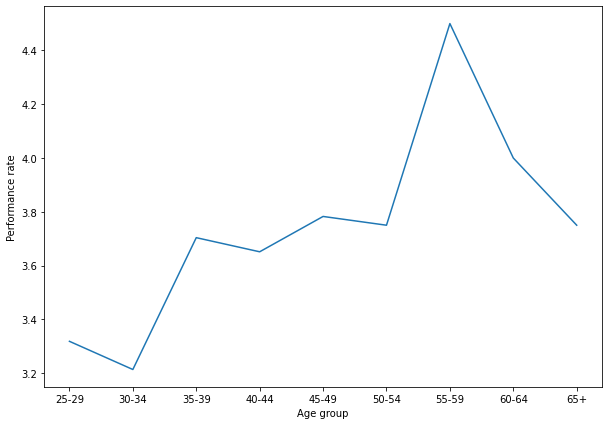

In [25]:
sns.lineplot(x='Age group', y='Performance rate', data=age_efficiency)

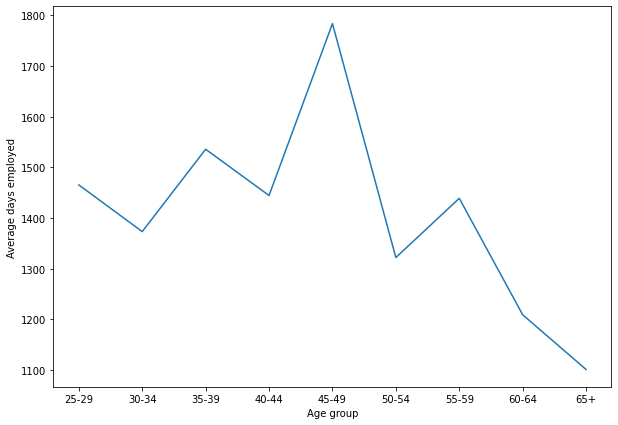

In [26]:
sns.lineplot(x='Age group', y='Average days employed', data=age_efficiency)

По графику видно, что кривая эффективности ведёт себя скачкообразно, перемещаясь между группами возрастов. Так как
группы 55-59, 60-64 и 65+ представлены малым кол-вом людей, рассматривать их показатели будет неправильно. В целом,
с возрастом эффективность сотрудника повышается. Если в 30-34 года она на уровне 3,19, то в 45-49 уже 4,04.  
**Вывод:** с возрастом эффективность сотрудника повышается.

### 3.4. Зависимость эффективности сотрудника и продолжительности работы в компании от семейного положения. <a id="section34"></a>

In [27]:
marital_status_efficiency = pd.read_sql_query('''
SELECT sex, maritaldesc,
AVG(CASE
    WHEN "Performance Score" = 'Exceptional' THEN 6
    WHEN "Performance Score" = 'Exceeds' THEN 5
    WHEN "Performance Score" = 'Fully Meets' THEN 4
    WHEN "Performance Score" = '90-day meets' THEN 3
    WHEN "Performance Score" = 'Needs Improvement' THEN 2
    WHEN "Performance Score" = 'PIP' THEN 1
    WHEN "Performance Score" = 'N/A- too early to review' THEN 0
END) AS "Performance rate",
AVG("Days Employed") AS "Average days employed",
COUNT(*) AS "Group size"
FROM hr_dataset
WHERE "Days Employed" > 365
GROUP BY sex, maritaldesc
ORDER BY sex, maritaldesc DESC;
''', conn)
marital_status_efficiency.set_index(['sex', 'maritaldesc'])

Performance rate  Average days employed  Group size
sex    maritaldesc                                                     
Female Widowed              2.666667             850.333333           3
       Single               3.366197            1491.718310          71
       Separated            3.333333            1378.666667           9
       Married              3.677419            1526.629032          62
       Divorced             4.200000            1441.800000          10
Male   Widowed              3.333333            1427.333333           3
       Single               3.727273            1453.981818          55
       Separated            4.333333            2677.666667           3
       Married              3.133333            1254.044444          45
       Divorced             3.909091            1589.090909          11

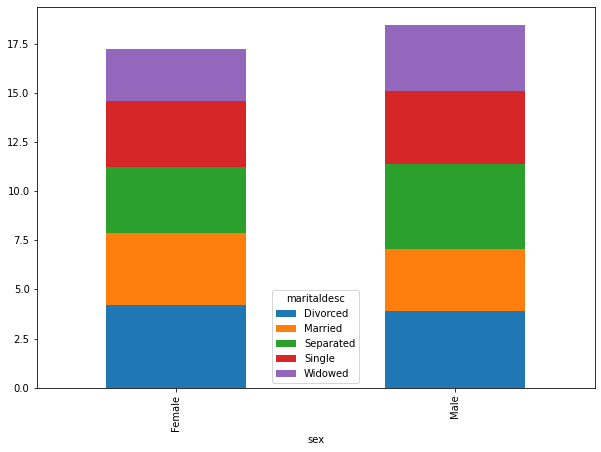

In [28]:
marital_status_efficiency_perf = marital_status_efficiency.pivot\
(index='sex', columns='maritaldesc', values='Performance rate')

marital_status_efficiency_perf.plot.bar(stacked=True)

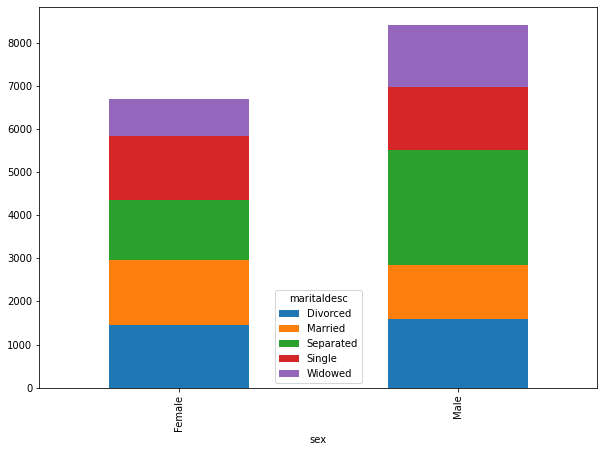

In [29]:
marital_status_efficiency_days = marital_status_efficiency.pivot\
(index='sex', columns='maritaldesc', values='Average days employed')

marital_status_efficiency_days.plot.bar(stacked=True)

Из графика можно увидеть, что мужчины немного эффективнее женщин. Однако, имеется смысл анализировать факторы, вляиющие
на эффективность, для разных полов отдельно. Как ни странно максимальная эффективность у разведенных сотрудников женского пола
(4.2). С большим отрывом идут замужние работницы - 3.7. Одиноки и живущие раздельно сотрудницы показывают среднюю
эффективность - 3.4 и 3.3 Самая низкая эффективность (3.7) у вдов.
У мужской части коллектива ситуация немного отличается. Лучше всех показали себя работники, живущие отдельно от семьи - 4.3.
Затем неплохую оценку получили мужчины, находящиеся в процессе развода (3.9). Оценка выше среднего также получили холостые
сотрудники - 3.7. Оценку ниже среднего получили сотрудники вдовцы (3.3). Хуже вдовцов только женатые сотрудники - 3.3.  
**Вывод:** эффективность сотрудника почти не зависит от семейного положения.

### 3.5. Зависимость эффективности сотрудника и продолжительности работы в компании от расы. <a id="section35"></a>

In [30]:
race_efficiency = pd.read_sql_query('''
SELECT
racedesc,
AVG(CASE
    WHEN "Performance Score" = 'Exceptional' THEN 6
    WHEN "Performance Score" = 'Exceeds' THEN 5
    WHEN "Performance Score" = 'Fully Meets' THEN 4
    WHEN "Performance Score" = '90-day meets' THEN 3
    WHEN "Performance Score" = 'Needs Improvement' THEN 2
    WHEN "Performance Score" = 'PIP' THEN 1
    WHEN "Performance Score" = 'N/A- too early to review' THEN 0
END) AS "Performance rate",
AVG("Days Employed") AS "Average days employed",
COUNT(*) AS "Group size"
FROM hr_dataset
WHERE "Days Employed" > 365
GROUP BY racedesc
ORDER BY "Performance rate" DESC;
''', conn)
race_efficiency

,racedesc,Performance rate,Average days employed,Group size
0,American Indian or Alaska Native,4.500000,1845.000000,4
1,Asian,3.607143,1372.750000,28
2,Two or more races,3.588235,1721.411765,17
3,Black or African American,3.557692,1555.884615,52
4,White,3.476190,1392.630952,168
5,Hispanic,3.333333,2062.333333,3


Не будем учитывать в статистике расы численностью менее 5 человек.  
**Вывод:** самыми эффективными сотрудниками являются азиаты и представители смешанных рас (3.6). Афроамериканцы имеют средний показатель эффективности на уровне 3.6. Белые сотрудники - 3.3.

## 4. Оценка текучести каждого департамента. <a id="section4"></a>
Будем считать, что сотрудники, которые отработали меньше года и уволились, будут составлять "текучесть".
Конечно, все это будет поделено на кол-во устроившихся сотрудников.

In [31]:
turnover_by_deps = pd.read_sql_query('''
CREATE TEMPORARY TABLE IF NOT EXISTS turnover_table_1 AS
    SELECT "department",
    COUNT(*) AS "number of employees"
    FROM hr_dataset
    GROUP BY "department"
    ORDER BY "department";

CREATE TEMPORARY TABLE IF NOT EXISTS turnover_table_2 AS
    SELECT "department",
    COUNT(*) AS "turnover_employees"
    FROM hr_dataset
    WHERE "Reason For Term" NOT IN ('N/A - Has not started yet', 'medical issues', 'return to school',\
        'relocation out of area', 'gross misconduct', 'military', 'retiring', 'N/A - still employed')
    GROUP BY "department"
    ORDER BY "department";

SELECT turnover_table_1."department",
CAST("turnover_employees" AS decimal(30, 20)) / "number of employees" * 100 AS "terms-hires score"
FROM turnover_table_1
JOIN turnover_table_2 ON turnover_table_2."department" = turnover_table_1."department"
ORDER BY "terms-hires score" DESC
''', conn)
turnover_by_deps.set_index('department', inplace=True)
turnover_by_deps

,terms-hires score
department,
Production,30.769231
Admin Offices,20.000000
Software Engineering,20.000000
IT/IS,18.000000
Sales,9.677419


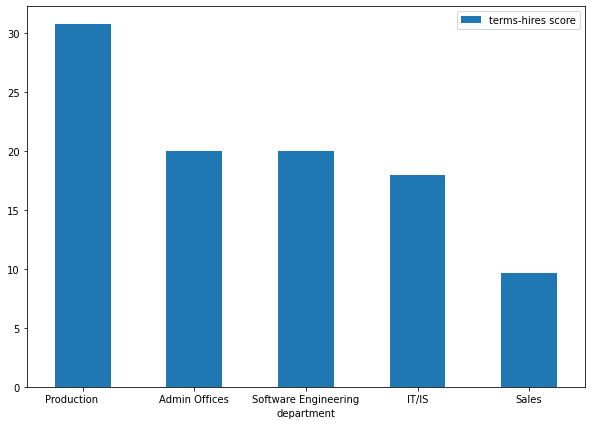

In [32]:
turnover_by_deps.plot.bar(rot=0)

**Вывод:**
 - наибольший процент "текучести" у департамента Production (30 % устроившихся сотрудников уволились, не отработав и года);
 - меньше всего у Sales (10 %);
 - у всех остальных примерно одинаково (20 %).

## 5. Оценка эффективности департамента. <a id="section5"></a>
### 5.1. Оценка эффективности департамента по удельному количеству увольнений. <a id="section51"></a>
Сначала создадим временные таблицы для промежуточных результатов. Затем создадим отдельную таблицу keep_score_table и выгрузим в неё оценку по каждой площадке. После же сделаем запрос на отображение результата по данному пункту.

In [33]:
department_perfomance_1 = pd.read_sql_query('''
CREATE TEMPORARY TABLE IF NOT EXISTS department_hires_table AS
    SELECT "department",
    COUNT(*) AS "Employees hires"
    FROM hr_dataset 
    GROUP BY hr_dataset."department"
    HAVING COUNT(*) >= 5
    ORDER BY "department";

CREATE TEMPORARY TABLE IF NOT EXISTS department_terms_table AS
    SELECT "department",
    COUNT(*) AS "Employees terms"
    FROM hr_dataset
    WHERE "Reason For Term" NOT IN ('N/A - Has not started yet', 'N/A - still employed')
    GROUP BY hr_dataset."department"
    ORDER BY "department";

CREATE TEMPORARY TABLE IF NOT EXISTS department_terms_rate_table AS
    SELECT department_hires_table."department", "Employees hires", "Employees terms",
    (CAST("Employees terms" AS decimal(30, 20)) / "Employees hires" * 100) AS "Terms rate"
    FROM department_hires_table
    JOIN department_terms_table ON department_terms_table."department" = department_hires_table."department"
    ORDER BY "Terms rate";

SELECT "department",
100 - 100 / ((SELECT MAX("Terms rate") FROM department_terms_rate_table) - (SELECT MIN("Terms rate") FROM department_terms_rate_table)) *
("Terms rate" - (SELECT MIN("Terms rate") FROM department_terms_rate_table)) AS "Keep_score"
INTO department_keep_score_table
FROM department_terms_rate_table;

SELECT *
FROM department_keep_score_table
''', conn)
department_perfomance_1

,department,Keep_score
0,Sales,1.000000e+02
1,Admin Offices,7.371626e+01
2,IT/IS,7.371626e+01
3,Software Engineering,3.668007e+01
4,Production,6.537236e-20


**Вывод:**  
 - лучше всех себя показал департамент Sales;
 - хуже всех - Production.

### 5.2. Оценка эффективности департамента по среднему Performance Score работников.  <a id="section52"></a>
Сначала создадим временные таблицы для промежуточных результатов. Затем создадим отдельную таблицу department_performance_score_table и выгрузим в неё оценку по каждому департаменту. После же сделаем запрос на отображение результата по данному пункту.

In [34]:
department_perfomance_2 = pd.read_sql_query('''
CREATE TEMPORARY TABLE IF NOT EXISTS department_performance_score_table_1 AS
    SELECT "department",
    SUM(CASE
        WHEN "Performance Score" = 'Exceptional' THEN 6
        WHEN "Performance Score" = 'Exceeds' THEN 5
        WHEN "Performance Score" = 'Fully Meets' THEN 4
        WHEN "Performance Score" = '90-day meets' THEN 3
        WHEN "Performance Score" = 'Needs Improvement' THEN 2
        WHEN "Performance Score" = 'PIP' THEN 1
        WHEN "Performance Score" = 'N/A- too early to review' THEN 0
        END) AS "Sum employee rate",
    COUNT("Employee Name") AS "Number of employees"
    FROM hr_dataset
    GROUP BY "department";

CREATE TEMPORARY TABLE IF NOT EXISTS department_performance_score_table_2 AS
    SELECT "department",
    "Sum employee rate" / "Number of employees" AS "Average department rate"
    FROM department_performance_score_table_1
    WHERE "Number of employees" >= 5;

SELECT "department",
(CASE
    WHEN "Average department rate" = 4 THEN 100
    WHEN "Average department rate" = 3 THEN 50
    WHEN "Average department rate" = 2 THEN 0
END) AS "Performance_score"
INTO department_performance_score_table
FROM department_performance_score_table_2;

SELECT *
FROM department_performance_score_table
''', conn)
department_perfomance_2

,department,Performance_score
0,Production,50
1,Admin Offices,50
2,IT/IS,50
3,Software Engineering,50
4,Sales,50


**Вывод:**  
 - у всех департментов одинаковая средняя оценка сотрудника.

### 5.3. Итоговая оценка департаментов. <a id="section53"></a>
Объединим две подготовленные таблицы и посчитаем сумму оценок

In [35]:
department_perfomance = pd.read_sql_query('''
SELECT department_keep_score_table."department",
"Keep_score",
"Performance_score",
"Keep_score" + "Performance_score" AS "Total_score"
FROM department_keep_score_table
JOIN department_performance_score_table
    ON department_performance_score_table."department" = department_keep_score_table."department"
ORDER BY "Total_score" DESC
''', conn)
department_perfomance

,department,Keep_score,Performance_score,Total_score
0,Sales,1.000000e+02,50,150.000000
1,Admin Offices,7.371626e+01,50,123.716255
2,IT/IS,7.371626e+01,50,123.716255
3,Software Engineering,3.668007e+01,50,86.680069
4,Production,6.537236e-20,50,50.000000


**Вывод:**  
 - ожидаемо Sales в лидерах, а Production в аутсайдерах.

## 6. Эффективность площадок для размещения вакансий. <a id="section6"></a>
### 6.1. Оценка площадки исходя из подсчёта расходов на неё и количества приведенных сотрудников. <a id="section61"></a>

In [36]:
'''
Создадим отдельную таблицу hire_cost_score_table и выгрузим в неё оценку по каждой площадке
Затем уже сделаем запрос на отображение результата по данному пункту.
'''

employment_source_perfomance_1 = pd.read_sql_query('''
SELECT hr_dataset."Employee Source",
(100 - CAST(100 AS decimal(30, 20)) / 1323 * recruiting_costs."Total" / COUNT(*)) AS "Hire_cost_score"
INTO hire_cost_score_table
FROM hr_dataset
FULL JOIN recruiting_costs ON recruiting_costs."Employment Source" = hr_dataset."Employee Source"
GROUP BY hr_dataset."Employee Source", recruiting_costs."Total";

SELECT hr_dataset."Employee Source",
COUNT(*) AS "Employees count",
recruiting_costs."Total",
CAST("Total" AS decimal(30, 20)) / COUNT(*) AS "Hire cost",
100 - CAST(100 AS decimal(30, 20)) / 1323 * "Total" / COUNT(*) AS "Hire_score"
FROM hr_dataset
JOIN recruiting_costs ON recruiting_costs."Employment Source" = hr_dataset."Employee Source"
GROUP BY hr_dataset."Employee Source", recruiting_costs."Total"
ORDER BY "Hire cost", "Employees count" DESC;
       ''', conn)
employment_source_perfomance_1

,Employee Source,Employees count,Total,Hire cost,Hire_score
0,Employee Referral,31,0,0.000000,1.000000e+02
1,Vendor Referral,15,0,0.000000,1.000000e+02
2,Glassdoor,14,0,0.000000,1.000000e+02
3,Word of Mouth,13,0,0.000000,1.000000e+02
4,Internet Search,6,0,0.000000,1.000000e+02
5,Information Session,4,0,0.000000,1.000000e+02
6,Company Intranet - Partner,1,0,0.000000,1.000000e+02
7,On-line Web application,1,0,0.000000,1.000000e+02
8,Professional Society,20,1200,60.000000,9.546485e+01
9,Pay Per Click - Google,21,3509,167.095238,8.736997e+01


Расчет производился по двум параметрам: кол-во приведенных площадкой сотрудников *(Employees count)* и годовых расходов на площадку *(Total)*.
Для получения объективной оценки для дальнейшего сравнения площадок полученный результат приводился к общему знаменателю: где 100 баллов это минимальные затраты на сотрудника, 0 баллов - максимальные.
Конечная формула имеет вид:
$$
h = \frac{t}{c}
$$
где с - кол-во приведенных площадкой сотрудников *(Employees count)*;  
t - годовые расходы на площадку *(Total)*.
$$
result = 100 - \frac{h - h_{min}}{h_{max} - h_{min}} \cdot 100
$$

В качестве нулевого результата была выбрана площадка *Pay Per Click* с результатом 1323 дол/чел, т.к. сайт *Careerbuilder* с результатом 7790.0 дол/чел стал слишком большим отклонением от среднего и не дал бы объективно оценивать оставшиеся результаты.

Конечно, 100 баллов показали площадки, не требующие расходов на привлечение сотрудников. Это площадки - *Employee Referral, Vendor Referral, Glassdoor, Word of Mouth, Internet Search, Information Session, Company Intranet - Partner, On-line Web application*.  
Отмечаем, что самым эффективным способом привлечения сотрудников является приглашения работающих сотрудников (Employee Referral) - 31 устроенный сотрудник. Из способов, не требующих затрат на размещение, можно выделить ещё три: рекомендации клиентов фирмы (Vendor Referral) (15 чел.), сайт размещения вакансий Glassdoor (14 чел.) и "сарафанное радио" (Word of Mouth) (13 чел.).  
Однако, зачастую для того чтобы найти подходящего сотрудника бесплатных способов недостаточно и приходится пользоваться платными услугами. Тройка платных эффективных площадок представлена Professional Society (95,5 баллов), Pay Per Click - Google (87,4 баллов), Search Engine - Google Bing Yahoo (84,3 баллов).  
Аутсайдерами данного рейтинга стали однозначно сайт Careerbuilder и Pay Per Click (0 баллов).  
**Вывод!**

### 6.2. Оценка площадки исходя из соотношения кол-ва приведенных сотрудников к кол-ву уволившихся.  <a id="section62"></a>

In [37]:
'''Сначала создадим временные таблицы для промежуточных результатов.
Затем создадим отдельную таблицу keep_score_table и выгрузим в неё оценку по каждой площадке.
После же сделаем запрос на отображение результата по данному пункту'''

employment_source_perfomance_2 = pd.read_sql_query('''
CREATE TEMPORARY TABLE IF NOT EXISTS hires_table AS
    SELECT hr_dataset."Employee Source",
    COUNT(*) AS "Employees hires"
    FROM hr_dataset
    GROUP BY hr_dataset."Employee Source"
    ORDER BY "Employee Source";

CREATE TEMPORARY TABLE IF NOT EXISTS terms_table AS
    SELECT "Employee Source",
    COUNT(*) AS "Employees terms"
    FROM hr_dataset
    WHERE "Reason For Term" NOT IN ('N/A - Has not started yet', 'N/A - still employed')
    GROUP BY hr_dataset."Employee Source"
    ORDER BY "Employee Source";

CREATE TEMPORARY TABLE IF NOT EXISTS terms_rate_table AS
    SELECT hires_table."Employee Source", "Employees hires", "Employees terms",
    (CAST("Employees terms" AS decimal(30, 20)) / "Employees hires" * 100) AS "Terms rate"
    FROM hires_table
    JOIN terms_table ON terms_table."Employee Source" = hires_table."Employee Source"
    ORDER BY "Terms rate";

SELECT "Employee Source",
100 - 100 / ((SELECT MAX("Terms rate") FROM terms_rate_table) - (SELECT MIN("Terms rate") FROM terms_rate_table)) *
("Terms rate" - (SELECT MIN("Terms rate") FROM terms_rate_table)) AS "Keep_score"
INTO keep_score_table
FROM terms_rate_table;

SELECT *,
100 - 100 / ((SELECT MAX("Terms rate") FROM terms_rate_table) - (SELECT MIN("Terms rate") FROM terms_rate_table)) *
("Terms rate" - (SELECT MIN("Terms rate") FROM terms_rate_table)) AS "Keep_score"
FROM terms_rate_table;
       ''', conn)
employment_source_perfomance_2

,Employee Source,Employees hires,Employees terms,Terms rate,Keep_score
0,Website Banner Ads,13,1,7.692308,1.000000e+02
1,On-campus Recruiting,12,1,8.333333,9.930556e+01
2,Employee Referral,31,4,12.903226,9.435484e+01
3,Pay Per Click - Google,21,3,14.285714,9.285714e+01
4,Professional Society,20,3,15.000000,9.208333e+01
5,MBTA ads,17,4,23.529412,8.284314e+01
6,Information Session,4,1,25.000000,8.125000e+01
7,Vendor Referral,15,4,26.666667,7.944444e+01
8,Newspager/Magazine,18,5,27.777778,7.824074e+01
9,Billboard,16,5,31.250000,7.447917e+01


Расчет производится по двум параметрам: кол-во приведенных площадкой сотрудников *(Employees count)* и кол-во уволившихся сотрудников, пришедших по объявлению этой же площадки, *(Employees terms)*.  
Результат также приводится к общему знаменателю: где 100 баллов это минимальное значение отношения уволившихся сотрудников к устроенным, 0 баллов - максимальное значение.
Конечная формула имеет вид:
$$
k =  \frac{t}{c} \cdot 100
$$
где t - кол-во уволившихся сотрудников *(Employees terms)*;  
с - кол-во приведенных площадкой сотрудников *(Employees count)*.
$$
result = 100 - \frac{k - k_{min}}{k_{max} - k_{min}} \cdot 100
$$

**Вывод:**  
Лидерами данного рейтинга стали площадки - *Website Banner Ads (100 баллов), On-campus Recruiting (99,3 баллов), Employee Referral (94,4 баллов)*.  
Высокий процент "удержания" сотрудника говорит о том, что люди, устраивающиеся через эти площадки имеют достаточную информацию и возможность понять, что они будут делать в этой компании.   
Аутсайдерами данного рейтинга стали *Pay Per Click (0 баллов), Company Intranet - Partner (0 баллов), On-line Web application (0 баллов)*.  
О низких результатах может говорить тот факт, что площадка не совсем точно описывает вакансию. Либо причина в том, что формат площадки не учитывает специфику компании и привлекает не тот круг лиц.

### 6.3. Оценка площадки исходя из оценки менеджерами сотрудников, пришедших через неё. <a id="section63"></a>

Введём *шкалу эффективности сотрудника:*  
'Exceptional' - 6  
'Exceeds' - 5  
'Fully Meets' - 4  
'90-day meets' - 3  
'Needs Improvement' - 2  
'PIP' - 1  
'N/A- too early to review' - исключим из анализа.

In [38]:
'''Сначала создадим временную таблицу employee_rate_table, где заменим "буквенную" информацию численной.
Затем создадим отдельную таблицу keep_score_table и выгрузим в неё оценку по каждой площадке.
После же сделаем запрос на отображение результата по данному пункту'''

employment_source_perfomance_3 = pd.read_sql_query('''
CREATE TEMPORARY TABLE IF NOT EXISTS employee_rate_table AS
    SELECT "Employee Source",
    SUM(CASE
        WHEN "Performance Score" = 'Exceptional' THEN 6
        WHEN "Performance Score" = 'Exceeds' THEN 5
        WHEN "Performance Score" = 'Fully Meets' THEN 4
        WHEN "Performance Score" = '90-day meets' THEN 3
        WHEN "Performance Score" = 'Needs Improvement' THEN 2
        WHEN "Performance Score" = 'PIP' THEN 1
        WHEN "Performance Score" = 'N/A- too early to review' THEN 0
    END) AS "Sum employee rate",
    COUNT("Employee Name") AS "Number of employees"
    FROM hr_dataset
    GROUP BY "Employee Source";

CREATE TEMPORARY TABLE IF NOT EXISTS perfomance_rate AS
    SELECT "Employee Source", "Number of employees", "Sum employee rate" / "Number of employees" AS "Average employee rate"
    FROM employee_rate_table
    WHERE "Number of employees" >= 5
    ORDER BY "Average employee rate" DESC, "Number of employees" DESC;

SELECT "Employee Source",
(CASE
    WHEN "Average employee rate" = 4 THEN 100
    WHEN "Average employee rate" = 3 THEN 50
    WHEN "Average employee rate" = 2 THEN 0
END) AS "Perfomance_score"
INTO perfomance_score_table
FROM perfomance_rate;

SELECT *,
(CASE
    WHEN "Average employee rate" = 4 THEN 100
    WHEN "Average employee rate" = 3 THEN 50
    WHEN "Average employee rate" = 2 THEN 0
END) AS "Perfomance_score"
FROM perfomance_rate;
       ''', conn)
employment_source_perfomance_3

,Employee Source,Number of employees,Average employee rate,Perfomance_score
0,MBTA ads,17,4,100
1,Indeed,8,4,100
2,Employee Referral,31,3,50
3,Diversity Job Fair,29,3,50
4,Search Engine - Google Bing Yahoo,25,3,50
5,Monster.com,24,3,50
6,Pay Per Click - Google,21,3,50
7,Professional Society,20,3,50
8,Billboard,16,3,50
9,Glassdoor,14,3,50


В данном анализе рассматривается оценка эффективности сотрудника *(Performance Score)*. Для дальнейшего расчета находим среднюю оценку сотрудника площадки *(Average employee rate)*.  
Далее результат приводится к общему знаменателю: где 100 баллов означает, что сотрудник полностью устраивает компанию *(Fully Meets)* , 50 баллов - сотрудник только недавно начал удовлетворять запросы компании *(90-day meets)* и 0 баллов - сотруднику не хватает профессиональных качеств.  
Средняя оценка сотрудника:
$$
a = \frac{\sum\limits_{i=1}^n t}{n}
$$
где t - оценка сотрудника *(Performance Score)*;  
n - кол-во оценок.
$$
result = \frac{a - a_{min}}{a_{max} - a_{min}} \cdot 100
$$

**Вывод:**  
Высоко были оценены сотрудники, пришедшие с *MBTA ads (100 баллов) и сайта Indeed (100 баллов)*.  
Такой процент эффективности можно попробовать объяснить тем, что площадка ещё на этапе размещения вакансии предъявляет высокие требования к соискателю, либо доступ к вакансии доступен только у близкого к профессии круга лиц.   
Большинство площадок имеют среднюю оценку сотрудника. И только три способа привлечения новых работников привели к низким оценкам со стороны менеджеров - *Newspager/Magazine (0 баллов), Vendor Referral (0 баллов), Website Banner Ads (0 баллов)*.  
Низкий результат возможно объясняется тем, что данный тип поиска вакансий доступен большому кругу соискателей, даже тому, кто очень далёк в профессиональном плане.

### 6.4. Оценка площадки исходя из кол-ва сотрудников, пришедших через неё. <a id="section64"></a>

In [39]:
'''Сначала создадим временную таблицу groupby_table, где посчитаем кол-во сотрудников,пришедших через площадку.
Затем создадим отдельную таблицу hires_count_score_table и выгрузим в неё оценку по каждой площадке.
После же сделаем запрос на выгрузку результата по данному пункту'''

employment_source_perfomance_4 = pd.read_sql_query('''
CREATE TEMPORARY TABLE IF NOT EXISTS groupby_table AS
    SELECT "Employee Source",
    COUNT(*) AS "Employees count"
    FROM hr_dataset
    GROUP BY "Employee Source"
    ORDER BY "Employees count" DESC;

SELECT 
"Employee Source",
(
CAST(100 AS decimal(30, 20)) /
((SELECT MAX("Employees count") FROM groupby_table) - (SELECT MIN("Employees count") FROM groupby_table)) *
("Employees count" - (SELECT MIN("Employees count") FROM groupby_table))
) AS "Hires_count_score"
INTO hires_count_score_table
FROM groupby_table;

SELECT 
"Employee Source",
"Employees count",
(
CAST(100 AS decimal(30, 20)) /
((SELECT MAX("Employees count") FROM groupby_table) - (SELECT MIN("Employees count") FROM groupby_table)) *
("Employees count" - (SELECT MIN("Employees count") FROM groupby_table))
) AS "Hires_count_score"
FROM groupby_table;
       ''', conn)
employment_source_perfomance_4

,Employee Source,Employees count,Hires_count_score
0,Employee Referral,31,100.000000
1,Diversity Job Fair,29,93.333333
2,Search Engine - Google Bing Yahoo,25,80.000000
3,Monster.com,24,76.666667
4,Pay Per Click - Google,21,66.666667
5,Professional Society,20,63.333333
6,Newspager/Magazine,18,56.666667
7,MBTA ads,17,53.333333
8,Billboard,16,50.000000
9,Vendor Referral,15,46.666667


Здесь находится кол-во сотрудников, пришедших через площадку *(Employees count)*.
Далее результат приводится к общему знаменателю: где 100 баллов - максимальное кол-во приведенных сотрудников, 0 баллов - минимальное.  
Средняя оценка сотрудника:
$$
С = \sum\limits_{с=1}^n 
$$
где с - сотрудник;  
n - последний сотрудник.
$$
result = \frac{С - С_{min}}{С_{max} - С_{min}} \cdot 100
$$

**Вывод:**  
Наибольшее кол-во сотрудников пришли по приглашениям сотрудников *(Employee Referral)* - 31 человек (100 баллов). Следующие популярные способы это Ярмарка вакансий *(Diversity Job Fair)* - 29 человек (93 баллов) и Search Engine - Google Bing Yahoo - 25 человек (80 баллов).  
Меньше всего сотрудников пришли из площадок *(Company Intranet - Partner , Careerbuilder, Pay Per Click, On-line Web application)* (0 баллов) по одному человеку.

In [40]:
'''Объединим все временные таблицы в общую и посчитаем сумму баллов по всем метрикам.
После же сделаем запрос на выгрузку результата по данному пункту'''

employment_source_perfomance_total = pd.read_sql_query('''
SELECT hire_cost_score_table."Employee Source",
"Hire_cost_score", "Keep_score",
"Perfomance_score",
"Hires_count_score",
"Hire_cost_score" + "Keep_score" + "Perfomance_score" + "Hires_count_score" AS "Total_score"
FROM hire_cost_score_table
JOIN keep_score_table ON keep_score_table."Employee Source" = hire_cost_score_table."Employee Source"
JOIN perfomance_score_table ON perfomance_score_table."Employee Source" = hire_cost_score_table."Employee Source"
JOIN hires_count_score_table ON hires_count_score_table."Employee Source" = hire_cost_score_table."Employee Source"
ORDER BY "Total_score" DESC;
       ''', conn)
employment_source_perfomance_total

,Employee Source,Hire_cost_score,Keep_score,Perfomance_score,Hires_count_score,Total_score
0,Employee Referral,100.000000,94.354839,50,100.000000,344.354839
1,Professional Society,95.464853,92.083333,50,63.333333,300.881519
2,Pay Per Click - Google,87.369974,92.857143,50,66.666667,296.893784
3,MBTA ads,51.180472,82.843137,100,53.333333,287.356943
4,Monster.com,81.859410,58.680556,50,76.666667,267.206633
5,Diversity Job Fair,73.881200,48.563218,50,93.333333,265.777752
6,Search Engine - Google Bing Yahoo,84.329554,43.333333,50,80.000000,257.662887
7,Glassdoor,100.000000,61.904762,50,43.333333,255.238095
8,Billboard,70.748299,74.479167,50,50.000000,245.227466
9,Word of Mouth,100.000000,50.000000,50,40.000000,240.000000


**Вывод:**  
Итак, самым эффективным способом по подбору персонала является приглашение сотрудника компании *(Employee Referral)* - 334 балла. Данный метод не несёт прямых затрат на подбор персонала, в то же время сотрудники, устроившиеся по приглашению  редко увольняются. Сотрудники, пришедшие по приглашению, чаще получают оценку менеджера *”90-day meets”*, что соответствует средней оценке сотрудника. И еще одной причиной эффективности площадки стало наибольшее кол-во людей, приведенное ей.  

Успех данного способа подбора персонала можно объяснить его спецификой. Данный метод не предполагает обращение и оплаты услуг третьих лиц. Также, приглашая кого-то в компанию, сотрудник зачастую становится куратором для новичка и отвечает за своё предложение, что объясняет «усидчивость» сотрудника и хорошую оценку эффективности сотрудника. К тому же, данным методом набирается приличное число сотрудников, и нет проблем с масштабированием метода.  

Второй по эффективности площадкой стало сообщество специалистов *(Professional Society)* (295 балл). Площадка уступает лидеру только кол-вом сотрудников  - 31 приведенный сотрудник против 20. Отличные показатели также диктует специфика площадки. Как минимум, прежде чем попасть на собеседование в компанию необходимо пройти отбор в сообщество, что уже отсеивает большое кол-во потенциальных резюме. К тому же сообщество может предоставлять всю необходимую информацию о компании и люди заранее знают, куда идут.  

И третье место по эффективности занимает контекстная реклама Google (290 балл). Минус данной площадки это более высокая, чем у лидеров,  стоимость размещения объявления. Однако, по всем остальным параметрам, площадка находится на уровне остальных лидеров. Успех площадки, возможно, продиктован правильными алгоритмами размещения рекламы. К примеру, реклама всплывает в близких к профессии сообществах и информационных ресурсах.  

Наихудшими площадками при оценке по всем параметрам стали *Website Banner Ads (194 балл), Newspager/Magazine (194 балл), Social Networks - Facebook Twitter etc (171 балл)*.  

Почти все компании из списка аутсайдеров предоставляют сотрудников, эффективность которых оценили не высоко. Площадки требуют неоправданно высокой оплаты за подбор сотрудников, что также опускает их в рейтинге.  

**Рекомендации для дальнейшей работой с площадками для размещения вакансий:**  
* Подбор персонала по приглашению сотрудника фирмы *(Employee Referral)* - лучший способ привлечения кадров. Стоит рассмотреть вариант масштабирования данного способа.  

* Сообщество специалистов *(Professional Society)* - стало бы лучшим с привлечением большего кол-ва соискателей и  бесплатной основой.  

* Контекстная реклама Google - рекомендации аналогичны с сообществом специалистов.  

* Реклама в общественном транспорте *(MBTA ads)* - рассмотреть возможность снизить плату за размещение, т. к. по сравнению с другими способами она считается высокой (10 980 долл.). Также пойдет на пользу произвести больший охват аудитории из-за того, что площадка приводит среднее количество людей (17 человек).  

* Сайт *Monster.com* - сотрудники, устроившиеся через данную площадку, часто увольняются (11 уволившихся на 24 принятых сотрудника). Стоит проверить информацию о вакансии на данном ресурсе, возможно, люди получают не то, что указано в объявлении. Либо площадка охватывает неподходящую категорию лиц.  

* Ярмарка вакансий *(Diversity Job Fair)* - хоть площадка и приводит много сотрудников (29 человек), она характеризуется низкой «усидчивостью» этих сотрудников: часто увольняются (16 уволившихся на 29 принятых сотрудника). К тому же компания несёт немалые расходы на организацию своего участия (10 021 долл.) и  выявленные факты могут стать подспорьем для снижения стоимости размещения вакансий.  

* Площадка размещения вакансий *Glassdoor* - главный плюс площадки это бесплатная основа. Однако по всем остальным параметрам она показывает плохой результат. Во-первых, площадка приводит малое кол-во сотрудников (14 человек), во-вторых эти сотрудники довольно часто увольняются (6 уволившихся сотрудников). В качестве рекомендации стоит уделить особое внимание на правильное понимание будущим сотрудником своей потенциальной работы.  

* Сотрудники, нашедшие компанию, в результатах поисковых систем Google, Bing, Yahoo *(Search Engine - Google Bing Yahoo)*. Сотрудники данной категории очень часто увольняются (15 увольнений на 25 принятых). Однако, площадка приводит большое кол-во сотрудников (25 человек). В качестве рекомендации стоит уделить особое внимание на правильное понимание будущим сотрудником своей потенциальной работы.  

* Объявление на рекламных щитах *(Billboard)*. Характеризуется средней оценкой по финансовой эффективности размещения объявления (387 долл. за одного подошедшего сотрудника) и «усидчивости» принятых сотрудников (5 увольнений на 16 принятых).  Однако, данный способ приводит малое количество подходящих соискателей (16 человек). Стоит, рассмотреть карту размещения объявлений, возможно щиты размещены не эффективно, либо охватывают неподходящий контингент лиц.  

* Сотрудники, нашедшие компанию, в результатах остальных поисковых системах *(Internet Search)*. В отличие от известных поисковых систем, в данном случае доступ к информации о вакансии производится на бесплатной основе. К сожалению, пока через площадку устроилось мало сотрудников (6 человек), и говорить о точной статистике сложно. А на данный момент сотрудники, нашедшие работу, через поисковики показывают средний показатель «усидчивости» (2 уволившихся на 6 набранных) и среднюю оценку эффективности *(”90-day meets”)*. Однозначно стоит обратить внимание на данные площадки и рассмотреть платное поднятие сайтов с информацией о фирме в поисковых запросах. Либо обратиться к услугам сторонних лиц с той же целью (SEO).  

* *Word of Mouth*, оно же сарафанное радио. Оно не требует затрат, это безусловное преимущество. Данный способ обеспечивает среднее кол-во новых сотрудников, и эти сотрудники устраивают руководителей. Однако на этом плюсы заканчиваются. Площадка демонстрирует высокий уровень увольнений сотрудников (7 ушедших против 13 прибывших). Такой высокий уровень увольняемости может быть обусловлен низкой осведомленностью сотрудника о будущей должности либо завышенными ожиданиями от фирмы. Возможно, компании стоит вести более открытую публичную и информационную деятельность. А отделу HR стоит получше узнать у сотрудника о том, что он представляет про будущую должность и фирму.  

* *On-campus Recruiting* - целевой набор студентов. Сотрудники, принятые по такой схеме показывают средний уровень эффективности и высокий уровень «усидчивости». Однако такой набор весьма затратен (7500 долл.) и привлекает мало сотрудников (12 человек). Как рекомендация для отдела HR: стоит увеличить эффективность данного метода, так как затраты высокие, а приход сотрудников низкий. На данный момент это не эффективный метод привлечения сотрудников.  

* Одним из неэффективных методов является подбор персонала по рекомендациям клиентов фирмы *(Vendor Referral)*. Хоть данный метод и не предполагает затрат, он имеет большой недостаток - низкая эффективность сотрудников *(“Needs Improvement'”)*. Данный параметр высчитан по достаточной выборке людей (15 человек) и претендует на точность. Можно предположить, что низкая оценка эффективности сотрудников является результатом сотрудничества с фирмами-клиентами компании. Однозначно стоит обратить пристальное внимание на профессиональную подготовку таких кандидатов.  

* Другие информационные каналы по подбору сотрудников *(Other)*, показывают ещё меньшую эффективность, т.к. несут большие затраты (3995 долл.) и привлекают мало сотрудников (9 человек). Стоит детальнее рассмотреть ресурсы в данной категории и исключить траты по некоторым пунктам.  

* Целевая реклама на сайтах *(Website Banner Ads)* входит в тройку самых неэффективных методов по привлечению сотрудников. Хоть метод и показал максимальный показатель «усидчивости» сотрудников, главными недостатками данного метода является высокая стоимость содержания рекламы (7143 долл.)  и низкая оценка эффективности сотрудника *(“Needs Improvement'”)*. Стоит пересмотреть список сайтов для размещения рекламы фирмы.  

* Реклама в газетах и журналах *(Newspaper/Magazine)*. Содержание рекламы в газетах и журналах дорого обходится компании (8291 долл.), а сотрудники не отличаются эффективностью *(“Needs Improvement'”)*. Так как по объявлению устраивается достаточное кол-во претендентов (18 человек) стоит внимательнее отнестись к профессиональным навыкам претендента.  
  
* Самым неэффективным способом набора кадров является набор из соцсетей. Содержание группы либо затраты на рекламу стоят компании 5573 долл. в год, что по сравнению с другими методами считается дорогим. К тому же пришедшие сотрудники из данной категории часто увольняются (8 увольнений на 11 пришедших), что говорит о слабой осведомлённости сотрудника о нюансах работы в данной компании. Возможно, это связано с определенным контингентом соцсетей, которому не подходит работа в данной фирме. Стоит обратить внимание на данную проблему и доносить до соискателей информацию, которая даст понятие о будущей должности больше информации.  

## 7. Оценка эффективности менеджера. <a id="section7"></a>
### 7.1. Оценка эффективности менеджера по удельному кол-ву увольнений. <a id="section71"></a>

In [41]:
manager_perfomance_1 = pd.read_sql_query('''
CREATE TEMPORARY TABLE IF NOT EXISTS manager_hires_table AS
    SELECT "Manager Name",
    COUNT(*) AS "Employees hires"
    FROM hr_dataset
    GROUP BY "Manager Name"
    ORDER BY "Manager Name";

CREATE TEMPORARY TABLE IF NOT EXISTS manager_terms_table AS
    SELECT "Manager Name",
    COUNT(*) AS "Employees terms"
    FROM hr_dataset
    WHERE "Reason For Term" NOT IN ('N/A - still employed', 'N/A - Has not started yet')
    GROUP BY "Manager Name"
    ORDER BY "Manager Name";

CREATE TEMPORARY TABLE manager_terms_rate_table AS
    SELECT manager_hires_table."Manager Name",
    CAST("Employees terms" AS decimal(30, 20)) / "Employees hires" * CAST(100 AS decimal(30, 20)) AS "Terms rate"
    FROM manager_hires_table
    INNER JOIN manager_terms_table
        ON manager_terms_table."Manager Name" = manager_hires_table."Manager Name"
    ORDER BY "Terms rate";

SELECT "Manager Name",
(
100 - 100  /
((SELECT MAX("Terms rate") FROM manager_terms_rate_table) - (SELECT MIN("Terms rate") FROM manager_terms_rate_table)) *
("Terms rate" - (SELECT MIN("Terms rate") FROM manager_terms_rate_table))
) AS "Keep_score"
INTO manager_keep_score_table
FROM manager_terms_rate_table
ORDER BY "Keep_score" DESC;


SELECT *
FROM manager_keep_score_table
''', conn)
manager_perfomance_1

,Manager Name,Keep_score
0,Peter Monroe,1.000000e+02
1,Jennifer Zamora,8.695652e+01
2,Brandon R. LeBlanc,8.695652e+01
3,John Smith,7.391304e+01
4,Ketsia Liebig,6.956522e+01
5,Kelley Spirea,6.324111e+01
6,David Stanley,6.086957e+01
7,Brannon Miller,6.086957e+01
8,Janet King,5.537757e+01
9,Alex Sweetwater,5.217391e+01


### 7.2. Оценка эффективности менеджера по среднему Performance Score работников. <a id="section72"></a>

In [42]:
manager_perfomance_2 = pd.read_sql_query('''
CREATE TEMPORARY TABLE IF NOT EXISTS manager_performance_score_table_1 AS
    SELECT "Manager Name",
    SUM(CASE
            WHEN "Performance Score" = 'Exceptional' THEN 6
            WHEN "Performance Score" = 'Exceeds' THEN 5
            WHEN "Performance Score" = 'Fully Meets' THEN 4
            WHEN "Performance Score" = '90-day meets' THEN 3
            WHEN "Performance Score" = 'Needs Improvement' THEN 2
            WHEN "Performance Score" = 'PIP' THEN 1
            WHEN "Performance Score" = 'N/A- too early to review' THEN 0
        END) AS "Sum employee rate",
    COUNT(*) AS "Number of employees"
    FROM hr_dataset
    GROUP BY "Manager Name";

CREATE TEMPORARY TABLE IF NOT EXISTS manager_performance_score_table_2 AS
    SELECT "Manager Name",
    "Sum employee rate" / "Number of employees"  AS "Average manager rate"
    FROM manager_performance_score_table_1;

SELECT "Manager Name",
(CASE
    WHEN "Average manager rate" = 4 THEN 100
    WHEN "Average manager rate" = 3 THEN 50
    WHEN "Average manager rate" = 2 THEN 0
END) AS "Performance_score"
INTO manager_performance_score_table
FROM manager_performance_score_table_2
ORDER BY "Performance_score" DESC;

SELECT *
FROM manager_performance_score_table
''', conn)
manager_perfomance_2

,Manager Name,Performance_score
0,Board of Directors,100
1,Janet King,100
2,Brian Champaigne,100
3,Jennifer Zamora,100
4,Eric Dougall,100
5,Webster Butler,50
6,Lynn Daneault,50
7,Elijiah Gray,50
8,Alex Sweetwater,50
9,David Stanley,50


### 7.3. Оценка эффективности менеджера по количеству подчинненных. <a id="section73"></a>

In [43]:
manager_perfomance_3 = pd.read_sql_query('''
CREATE TEMPORARY TABLE IF NOT EXISTS managers_employees_score_table_1 AS
    SELECT "Manager Name",
    COUNT(*) AS "Number of employees"
    FROM hr_dataset
    GROUP BY "Manager Name";

SELECT "Manager Name",
(
100 /
((SELECT MAX("Number of employees") FROM managers_employees_score_table_1) -
(SELECT MIN("Number of employees") FROM managers_employees_score_table_1)) *
("Number of employees" - (SELECT MIN("Number of employees") FROM managers_employees_score_table_1))
) AS "Employees_score"
INTO managers_employees_score_table
FROM managers_employees_score_table_1
ORDER BY "Employees_score" DESC;

SELECT *
FROM managers_employees_score_table
''', conn)
manager_perfomance_3

,Manager Name,Employees_score
0,Kelley Spirea,100
1,Michael Albert,100
2,Elijiah Gray,100
3,Kissy Sullivan,100
4,Ketsia Liebig,95
5,David Stanley,95
6,Webster Butler,95
7,Amy Dunn,95
8,Brannon Miller,95
9,Janet King,85


### 7.4. Итоговая оценка эффективности менеджера. <a id="section74"></a>

In [44]:
manager_perfomance = pd.read_sql_query('''
SELECT manager_keep_score_table."Manager Name",
"Keep_score", "Performance_score", "Employees_score",
"Keep_score" + "Performance_score" + "Employees_score" AS "Total_score"
FROM manager_keep_score_table
JOIN manager_performance_score_table
    ON manager_performance_score_table."Manager Name" = manager_keep_score_table."Manager Name"
JOIN managers_employees_score_table
    ON managers_employees_score_table."Manager Name" = manager_keep_score_table."Manager Name"
ORDER BY "Total_score" DESC
''', conn)
manager_perfomance

,Manager Name,Keep_score,Performance_score,Employees_score,Total_score
0,Janet King,5.537757e+01,100,85,240.377574
1,Ketsia Liebig,6.956522e+01,50,95,214.565217
2,Kelley Spirea,6.324111e+01,50,100,213.241107
3,Jennifer Zamora,8.695652e+01,100,25,211.956522
4,David Stanley,6.086957e+01,50,95,205.869565
5,Brannon Miller,6.086957e+01,50,95,205.869565
6,Elijiah Gray,4.664032e+01,50,100,196.640316
7,John Smith,7.391304e+01,50,60,183.913043
8,Kissy Sullivan,1.343874e+01,50,100,163.438735
9,Peter Monroe,1.000000e+02,0,60,160.000000


**Вывод:**  
представлен список сотрудников с оценками их эффективности.

## 8. Прогнозирование скорого увольнения. <a id="section8"></a>
Очень сложно предсказать увольнение сотрудника, отработавшего в фирме больше года. Попробуем это сделать, для сотрудников,
работающих меньше года, составляющих "текучку" в компании.  
Первым делом объединим таблицу hr_dataset с таблицами *salary_efficiency* и *experience_efficiency* (пункты 5.1 и 5.2 текущей работы).  
Далее оставим в датасете только сотрудников, уволившихся раньше года отработки и тех, кто принял решение продолжать работу еще на протяжении года. Далее пометим первую группу 1, а вторую 0. Причем в первую группу попадут не все уволившиеся раньше года отработки сотрудники, а только те, кто уволился по собственному желанию и не по форс-мажорным обстоятельствам.

In [54]:
salary_efficiency = pd.read_sql_query('''
CREATE TEMPORARY TABLE IF NOT EXISTS salary_grid_1 AS
    SELECT position,
    MIN("Pay Rate") AS "Hourly min",
    AVG("Pay Rate") AS "Hourly mid",
    MAX("Pay Rate") AS "Hourly max",
    (MIN("Pay Rate") + (MAX("Pay Rate") - MIN("Pay Rate")) / 3) AS "min_mid line",
    (MAX("Pay Rate") - (MAX("Pay Rate") - MIN("Pay Rate")) / 3) AS "mid_max line",
    COUNT(*) AS "Employees number"
    FROM hr_dataset
    GROUP BY position;

CREATE TEMPORARY TABLE IF NOT EXISTS salary_grid_2 AS
    SELECT *
    FROM salary_grid_1
    WHERE "Employees number" > 1;
    
SELECT salary_grid_2.position,
"Employee Name",
(CASE
    WHEN "Performance Score" = 'Exceptional' THEN 6
    WHEN "Performance Score" = 'Exceeds' THEN 5
    WHEN "Performance Score" = 'Fully Meets' THEN 4
    WHEN "Performance Score" = '90-day meets' THEN 3
    WHEN "Performance Score" = 'Needs Improvement' THEN 2
    WHEN "Performance Score" = 'PIP' THEN 1
    WHEN "Performance Score" = 'N/A- too early to review' THEN 0
END) AS "Performance rate",
(CASE
    WHEN hr_dataset."Pay Rate" < salary_grid_2."min_mid line" THEN 'min salary'
    WHEN hr_dataset."Pay Rate" BETWEEN salary_grid_2."min_mid line" AND salary_grid_2."mid_max line"\
        THEN 'mid salary'
    WHEN hr_dataset."Pay Rate" > salary_grid_2."mid_max line" THEN 'max salary'
END) AS "Salary status"
INTO salary_efficiency
FROM hr_dataset
JOIN salary_grid_2 ON salary_grid_2.position = hr_dataset.position;

SELECT "Salary status",
AVG("Performance rate") AS "Average performance rate"
FROM salary_efficiency
GROUP BY "Salary status"
ORDER BY "Salary status";
''', conn)
salary_efficiency

,Salary status,Average performance rate
0,max salary,3.359551
1,mid salary,3.232143
2,min salary,3.484848


In [55]:
experience_efficiency = pd.read_sql_query('''
CREATE TEMPORARY TABLE IF NOT EXISTS work_experience_1 AS
    SELECT position,
    MIN("Days Employed") AS "Experience min",
    AVG("Days Employed") AS "Experience mid",
    MAX("Days Employed") AS "Experience max",
    (MIN("Days Employed") + (MAX("Days Employed") - MIN("Days Employed")) / 3) AS "min_mid line",
    (MAX("Days Employed") - (MAX("Days Employed") - MIN("Days Employed")) / 3) AS "mid_max line",
    COUNT(*) AS "Employees number"
    FROM hr_dataset
    GROUP BY position;
    
CREATE TEMPORARY TABLE IF NOT EXISTS work_experience_2 AS
    SELECT *
    FROM work_experience_1
    WHERE "Employees number" > 1;

SELECT work_experience_2.position,
"Employee Name",
(CASE
    WHEN "Performance Score" = 'Exceptional' THEN 6
    WHEN "Performance Score" = 'Exceeds' THEN 5
    WHEN "Performance Score" = 'Fully Meets' THEN 4
    WHEN "Performance Score" = '90-day meets' THEN 3
    WHEN "Performance Score" = 'Needs Improvement' THEN 2
    WHEN "Performance Score" = 'PIP' THEN 1
    WHEN "Performance Score" = 'N/A- too early to review' THEN 0
END) AS "Performance rate",
(CASE
    WHEN hr_dataset."Days Employed" < work_experience_2."min_mid line" THEN 'min experience'
    WHEN hr_dataset."Days Employed" BETWEEN work_experience_2."min_mid line" AND work_experience_2."mid_max line"\
        THEN 'mid experience'
    WHEN hr_dataset."Days Employed" > work_experience_2."mid_max line" THEN 'max experience'
END) AS "Experience status"
INTO experience_efficiency
FROM hr_dataset
JOIN work_experience_2 ON work_experience_2.position = hr_dataset.position;

SELECT "Experience status",
AVG("Performance rate") AS "Average performance rate"
FROM experience_efficiency
GROUP BY "Experience status"
ORDER BY "Experience status";
''', conn)
experience_efficiency

,Experience status,Average performance rate
0,max experience,3.321429
1,mid experience,3.828125
2,min experience,2.844828


In [56]:
term_prediction_df = pd.read_sql_query('''
CREATE TEMPORARY TABLE IF NOT EXISTS term_prediction_table AS
    SELECT hr_dataset.*
    FROM hr_dataset
    JOIN experience_efficiency
        ON experience_efficiency."Employee Name" = hr_dataset."Employee Name"
    JOIN salary_efficiency
        ON salary_efficiency."Employee Name" = hr_dataset."Employee Name"
    WHERE "Days Employed" <= 730 AND
        "Reason For Term" NOT IN ('N/A - Has not started yet', 'medical issues', 'return to school',
        'relocation out of area', 'gross misconduct', 'military', 'retiring');

ALTER TABLE term_prediction_table ADD COLUMN "Target" INT;
UPDATE term_prediction_table SET "Target" = 0;

UPDATE term_prediction_table SET "Target" = 1
WHERE "Days Employed" < 365 AND
      "Reason For Term" <> 'N/A - still employed';

SELECT "sex", "maritaldesc", "racedesc", "department", "position", "Manager Name", "Employee Source", "Performance Score",
(CASE
    WHEN "age" BETWEEN 25 AND 30 THEN '25-29'
    WHEN "age" BETWEEN 30 AND 35 THEN '30-34'
    WHEN "age" BETWEEN 35 AND 40 THEN '35-39'
    WHEN "age" BETWEEN 40 AND 45 THEN '40-44'
    WHEN "age" BETWEEN 45 AND 50 THEN '45-49'
    WHEN "age" BETWEEN 50 AND 55 THEN '50-54'
    WHEN "age" BETWEEN 55 AND 60 THEN '55-59'
    WHEN "age" BETWEEN 60 AND 65 THEN '60-64'
    WHEN "age" >= 65 THEN '65+'
END) AS "Age group", 
(CASE
    WHEN "Days Employed" BETWEEN 0 AND 100 THEN '100-'
    WHEN "Days Employed" BETWEEN 100 AND 200 THEN '100-199'
    WHEN "Days Employed" BETWEEN 200 AND 300 THEN '200-299'
    WHEN "Days Employed" BETWEEN 300 AND 365 THEN '300-365'
    WHEN "Days Employed" >= 365 THEN '365+'
END) AS "Experience", 
"Target"
FROM term_prediction_table
''', conn)
term_prediction_df

,sex,maritaldesc,racedesc,department,position,Manager Name,Employee Source,Performance Score,Age group,Experience,Target
0,Female,Married,White,Admin Offices,Administrative Assistant,Brandon R. LeBlanc,Pay Per Click - Google,N/A- too early to review,30-34,100-,0
1,Female,Married,Asian,Admin Offices,Administrative Assistant,Brandon R. LeBlanc,Diversity Job Fair,Fully Meets,25-29,365+,0
2,Male,Married,White,Admin Offices,Shared Services Manager,Janet King,Monster.com,Fully Meets,30-34,365+,0
3,Female,Single,White,IT/IS,Database Administrator,Simon Roup,Search Engine - Google Bing Yahoo,Fully Meets,30-34,365+,0
4,Male,Married,White,IT/IS,Database Administrator,Simon Roup,Employee Referral,Fully Meets,30-34,365+,0
5,Male,Married,White,IT/IS,Sr. DBA,Simon Roup,Company Intranet - Partner,Fully Meets,40-44,365+,0
6,Male,Single,White,Production,Production Manager,Janet King,Pay Per Click - Google,Exceeds,30-34,365+,0
7,Male,Married,Asian,Production,Production Manager,Janet King,Other,Needs Improvement,40-44,365+,0
8,Female,Married,White,Production,Production Technician I,David Stanley,Search Engine - Google Bing Yahoo,Fully Meets,25-29,365+,0
9,Male,Single,Black or African American,Production,Production Technician I,Kissy Sullivan,MBTA ads,Needs Improvement,35-39,365+,0


In [57]:
from sklearn.preprocessing import LabelEncoder


# создадим функцию, которая будет кодировать данные в столбцах
def transform(df):
    transform_df = df.copy()
    le_dict = {column:LabelEncoder() for column in df.columns}
    for column, le_model in le_dict.items():
        le_dict[column] = le_model.fit(df[column])
        transform_df[column] = le_dict[column].transform(df[column])
    return transform_df, le_dict

# а эта функция будет декодировать данные в столбцах на основе передаваемого датасета и словаря енкодеров
def inverse_transform(transform_df, le_dict):
    inverse_transform_df = transform_df.copy()
    for column, le_model in le_dict.items():
        inverse_transform_df[column] = le_dict[column].inverse_transform(transform_df[column])
    return inverse_transform_df, le_dict

# закодируем данные датасета
df_for_learning = transform(term_prediction_df)[0]
le_dict = transform(term_prediction_df)[1]

In [58]:
import numpy as np

from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, recall_score, precision_score


# переведём все данные в числовой формат
# for column in [i for i in term_prediction_df.columns if i != 'Days Employed' and i != 'Pay Rate']:
#     term_prediction_df[column] = pd.factorize(term_prediction_df[column])[0]
# обзначим анализируемые и целевые фичи
x = df_for_learning.drop('Target', 1)
y = df_for_learning['Target']
# выбираем стратифицированную кросс-валидацию для дальнейшего GridSearch
skf = StratifiedKFold(n_splits=5, random_state=0)
# разделим датасет на тренировочную и тестовую выборку
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, stratify=y, random_state=0)
# возьмём интерпретируемый класификатор - дерево решений
dtc = DecisionTreeClassifier(random_state=0)
# базовые параметры
dtc_params = {'criterion': ['gini', 'entropy'], 'splitter': ['best', 'random'], 'max_depth': np.arange(3, 6),}
# создание GridSearch estimator'a
dtc_estimator = GridSearchCV(estimator=dtc, param_grid=dtc_params, cv=skf)
# обучение GS estimator'а на тренировочных данных и нахождение наилучших параметров
dtc_model = dtc_estimator.fit(x_train, y_train)
# предсказание обученной модели
y_pred = dtc_model.predict(x_test)
# процент правильных ответов
accuracy_score(y_test, y_pred)

C:\Users\Kirill\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


0.9411764705882353

Получилась достаточно точная прогностическая модель. Теперь посмотрим как будет строиться дерево решений.

In [59]:
dtc_estimator.best_params_

{'criterion': 'gini', 'max_depth': 3, 'splitter': 'random'}

In [60]:
dtc = DecisionTreeClassifier(criterion='gini', max_depth=3, splitter='random', random_state=0)
dtc_model = dtc.fit(x_train, y_train)
y_pred = dtc_model.predict(x_test)
# процент правильных ответов
accuracy_score(y_test, y_pred)

0.9411764705882353

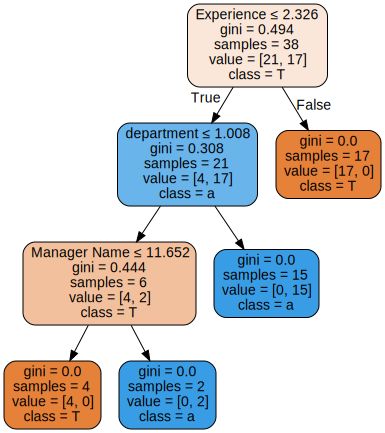

In [61]:
from sklearn import tree
import graphviz

def print_graph(data):
    dot_data = tree.export_graphviz(data, out_file=None,
                                    feature_names=x.columns,  
                                    class_names='Target',  
                                    filled=True, rounded=True,
                                    special_characters=True)  
    return graphviz.Source(dot_data)

print_graph(dtc_model)

Интерпретируем получившийся результат. ***class a*** это уволившийся сотрудник. Сначала расшифруем закодированные значения, фигурирующие в дереве столбцов.

In [62]:
columns = ['Experience', 'department', 'Manager Name']
for column in columns:
    classes = le_dict[column].classes_
    print(column)
    print({name:code for name, code in enumerate(classes)})
    print()

Experience
{0: '100-', 1: '100-199', 2: '200-299', 3: '300-365', 4: '365+'}

department
{0: 'Admin Offices', 1: 'IT/IS', 2: 'Production       ', 3: 'Sales'}

Manager Name
{0: 'Amy Dunn', 1: 'Brandon R. LeBlanc', 2: 'Brannon Miller', 3: 'Brian Champaigne', 4: 'David Stanley', 5: 'Elijiah Gray', 6: 'Janet King', 7: 'John Smith', 8: 'Kelley Spirea', 9: 'Ketsia Liebig', 10: 'Kissy Sullivan', 11: 'Michael Albert', 12: 'Simon Roup', 13: 'Webster Butler'}



Итак, если сотрудник проработал более 300 дней то не стоит ждать его скорого увольнения. Похоже на правду. Идем дальше.  
Если сотрудник работает менее 300 дней и работает он в департаментах *Production* или *Sales*, то есть риск его скорого ухода.  
Если сотрудник работает менее 300 дней и работает он в департаментах *Admin Offices* либо *IT/IS* под руководством *Simon Roup* и *Webster Butler*, то имеется риск его увольнения.